# Human Tumor Analysis


In [2]:
import sys
sys.path.insert(1, "/Users/smgroves/Dropbox (VU Basic Sciences)/pycharm_workspace/mazebox/")

import mazebox as mb
import scvelo as scv
import scanpy as sc
import os.path as op
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Bad key "text.kerning_factor" on line 4 in
/Users/smgroves/Documents/anaconda3/envs/py37/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


# Preprocessing

## Read in Files

In [3]:
indir = "../data/loom/"

samples = ['236D_236D_V300044428','3359-PK-1-GCCAAT-ATCAGT_S1_L001']
[a1,a2] = [mb.pp.read_loom(sample, indir) for sample in samples]


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


## Filter and concatenate

In [4]:
tfs = ['SP100', 'FOSL1', 'HES1', 'NFKBIZ', 'RELB', 'EPAS1', 'BCL3', 'REST', 'SP110', 'NFKB2', 'TEAD2', 'HMG20B', 'SIX5',
       'RARG', 'TEAD4', 'ZNF217', 'SP140L', 'SOX18', 'HOXC13', 'STAT6', 'ETV4', 'KLF2', 'MITF', 'NR0B2', 'ASCL1', 'ZBTB7C', 'ELF3',
       'RORC', 'FOXA2', 'ETS2','TOX3', 'XBP1', 'ST18', 'FOXA1', 'OVOL2', 'ZNF664', 'TBX10', 'PROX1', 'ETV6', 'CEBPD', 'TFCP2L1', 'FOXJ3',
       'ZNF407', 'ZNF511','ZNF396', 'RBPJ', 'ZSCAN31', 'HOXB5', 'ZNF3', 'TSHZ2', 'ZBTB16', 'ZNF10', 'FLI1', 'GATA4', 'NR0B1', 'NHLH1',
       'NEUROD6', 'ZNF581', 'TCF15', 'LYAR', 'ISL2', 'OLIG2', 'NEUROD1', 'INSM1', 'PAX5', 'SP6', 'MYT1', 'HES6', 'ZNF24', 'ISL1', 'ZNF397',
       'SOX11', 'ZNF253', 'SMAD4', 'RBP1', 'ONECUT2', 'ZNF711', 'DLX5', 'GRIP1', 'ZNF157', 'ZNF713', 'ZNF136', 'FOXN4', 'PATZ1', 'ZNF491',
       'ZBTB21', 'KLF12', 'ZNF501', 'ZNF785', 'CXXC1', 'ZNF324', 'ZNF764', 'ZBTB18', 'KAT8', 'ZNF334', 'POU4F1', 'ZNF250', 'ZNF132',
       'SALL2', 'DLX6', 'MBD1','SOX1', 'ZFP3', 'ZNF543', 'POU2F1', 'NONO', 'SMAD9', 'ZKSCAN2', 'TCF12', 'VEZF1', 'TOX', 'BHLHE22', 'MTA1',
       'TCF3', 'SCRT2', 'RFX7','NHLH2', 'SCRT1', 'RCOR2', 'PURG', 'TBPL1', 'TCF4', 'EBF1', 'ZNF749', 'NEUROD2', 'ZNF423', 'BACH2', 'GLI1',
       'ZFP64','NKX2-1', 'MYC', 'YAP1', 'POU2F3', 'MYCL', 'MYCN', 'ASCL2', 'AVIL', 'CHAT', 'GFI1B',
      'CHGA','EPCAM']


Dropkick is a tool to get rid of empty and low-quality droplets based on ambient reads. It should be applied to each sample separately, so we will apply first and then concantenate the data into one AnnData object.

In [14]:
batch_categories = ['Tumor 1','Tumor 2']
batch_key = 'tumor'

adata = a1.concatenate(a2, batch_key=batch_key, batch_categories=batch_categories)




In [15]:
adata = mb.pp.scanpy_recipe(adata, retain_genes=tfs,)

Filtered out 28364 genes that are detected in less than 3 cells (spliced).
Normalized count data: X, spliced, unspliced.
Logarithmized X.


## Cell Cycle Regression

calculating cell cycle phase
-->     'S_score' and 'G2M_score', scores of cell cycle phases (adata.obs)


... storing 'phase' as categorical


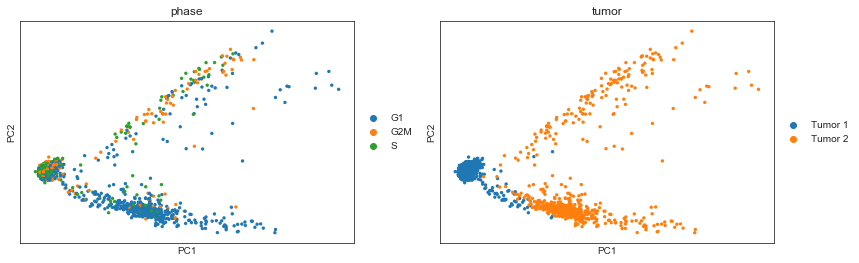

In [18]:
sc.pp.scale(adata)
scv.tl.score_genes_cell_cycle(adata)
sc.tl.pca(adata)
sc.pl.pca_scatter(adata, color=['phase','tumor'])

In [19]:
sc.pp.regress_out(adata, ['S_score', 'G2M_score'])
sc.pp.scale(adata)

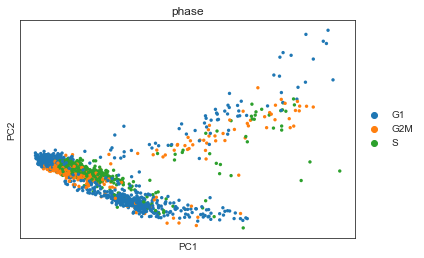

In [20]:
sc.tl.pca(adata)
sc.pl.pca_scatter(adata, color='phase')

# Dimensionality Reduction and RNA Velocity

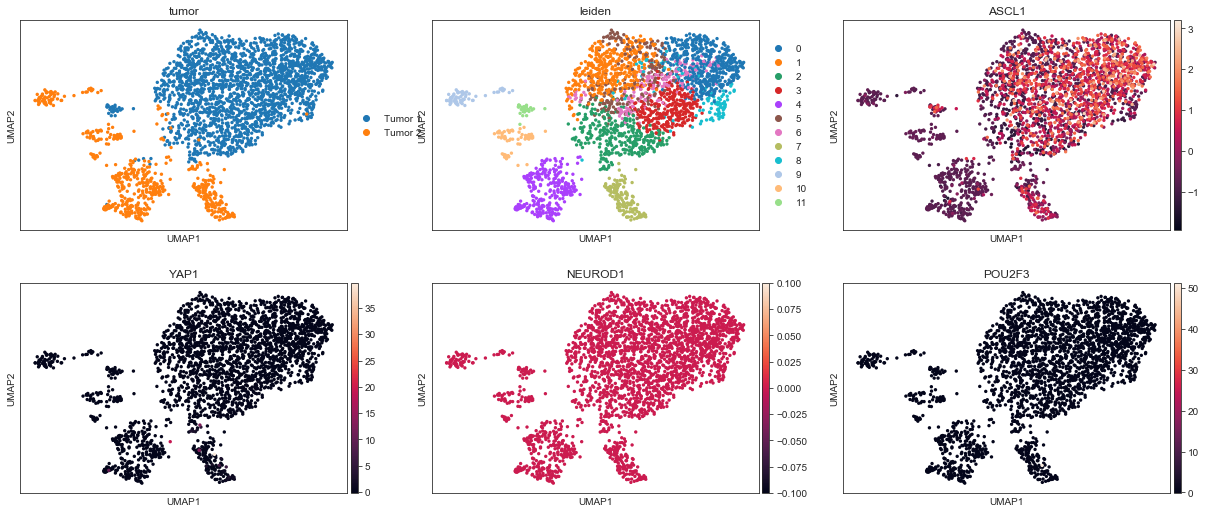

In [21]:
import matplotlib.pyplot as plt
sc.pp.neighbors(adata)
sc.tl.leiden(adata)
sc.tl.umap(adata, random_state = 1)
sc.pl.umap(adata, color = ['tumor','leiden','ASCL1','YAP1','NEUROD1','POU2F3'], ncols = 3)


In [22]:
adata.write_h5ad('../int/tumor/adata01.h5ad')

In [2]:
adata = sc.read_h5ad('../int/tumor/adata01.h5ad')

## Calculating Velocity

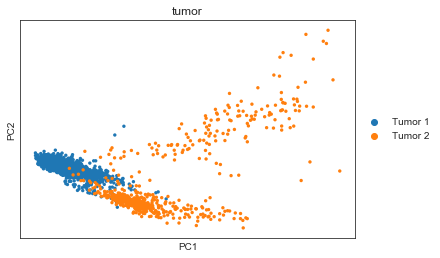

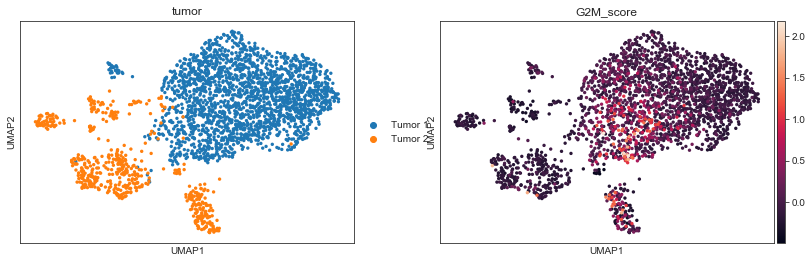

In [7]:
sc.pp.neighbors(adata, random_state=1) #recalculating after subsetting data and cell cycle correction)
sc.tl.pca(adata)
sc.tl.leiden(adata)
sc.tl.umap(adata, random_state=1)
sc.pl.pca(adata, color = 'tumor')
sc.pl.umap(adata, color = ['tumor','G2M_score'])


In [13]:
scv.pp.moments(adata)
scv.tl.velocity(adata, mode = 'deterministic', groupby='tumor')
scv.tl.velocity_graph(adata)


computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
computing velocities
    finished (0:00:01) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph
    finished (0:00:14) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


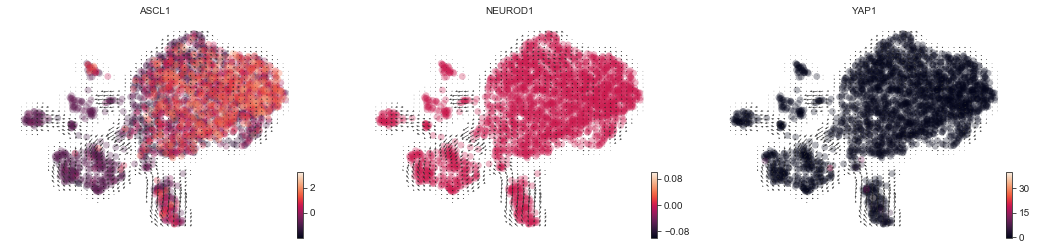

In [14]:
scv.pl.velocity_embedding_grid(adata, basis = 'umap', color = ['ASCL1','NEUROD1','YAP1'], 
                               figsize = (6,4), alpha=.3, smooth =True)

--> added 'velocity_length' (adata.obs)
--> added 'velocity_confidence' (adata.obs)


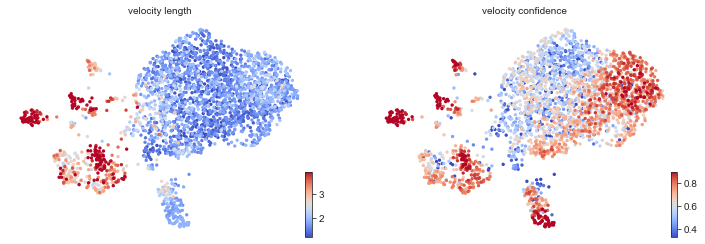

In [15]:
scv.tl.velocity_confidence(adata)

keys = 'velocity_length', 'velocity_confidence'  
scv.pl.scatter(adata, c=keys, cmap='coolwarm', perc=[5, 95], basis = 'umap')

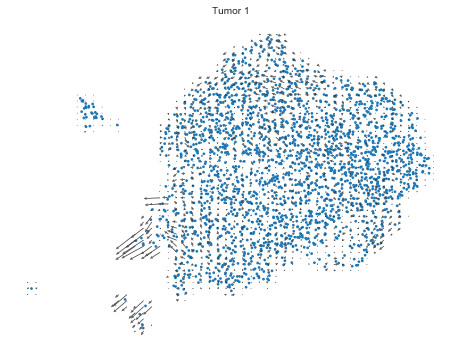

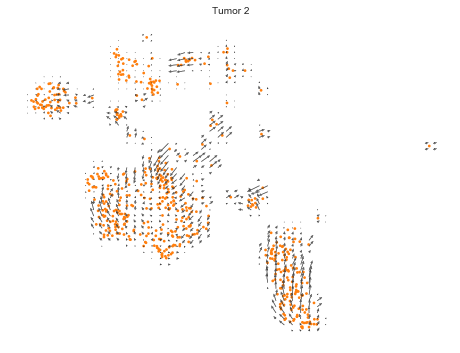

In [16]:
for g in adata.obs['tumor'].cat.categories:
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot()
    scv.pl.velocity_embedding_grid(adata[adata.obs['tumor']==g], basis = 'umap', ax = ax, show = False, color = 'tumor', size = 30, alpha = 1, vmax = 4, vmin = 0, title = g)


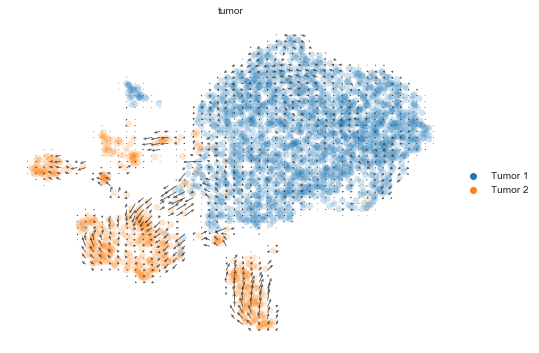

In [17]:
scv.pl.velocity_embedding_grid(adata, basis = 'umap', figsize = (8,6), legend_loc = 'on right',color = 'tumor')


computing velocity embedding
    finished (0:00:00) --> added
    'velocity_pca', embedded velocity vectors (adata.obsm)


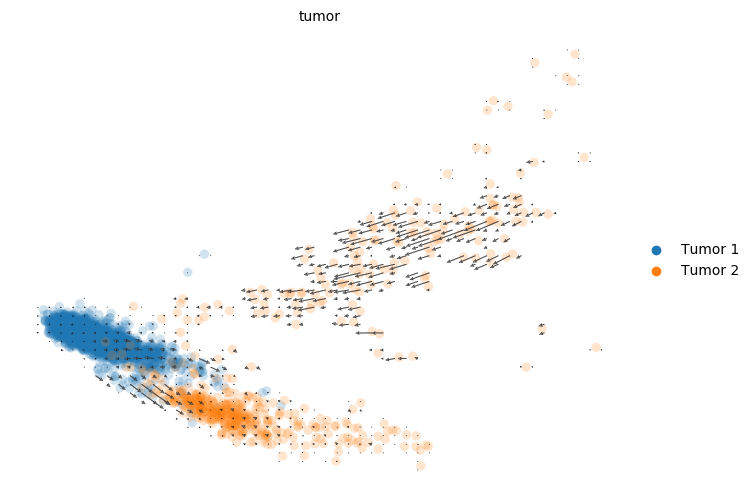

In [7]:
scv.pl.velocity_embedding_grid(adata, basis = 'pca', figsize = (8,6), legend_loc = 'on right',color = 'tumor')


Let's save the data at this point.

In [18]:
adata.write_h5ad('../int/tumor/adata02.h5ad')

In [2]:
adata = sc.read_h5ad('../int/tumor/adata02.h5ad')

# Pseudotime and plasticity

We would like to see if we can get the same results as Ireland et al. did for their pseudotime analysis. To run Monocle2, we need the R interface `rpy2`. We'll also use the pseudotime inference within scvelo for comparison.

In [19]:
scv.tl.terminal_states(adata, groupby='tumor')

computing terminal states
    identified 4 regions of root cells and 1 region of end points  (Tumor 1).
    identified 5 regions of root cells and 1 region of end points  (Tumor 2).
    finished (0:00:00) --> added
    'root_cells', root cells of Markov diffusion process (adata.obs)
    'end_points', end points of Markov diffusion process (adata.obs)


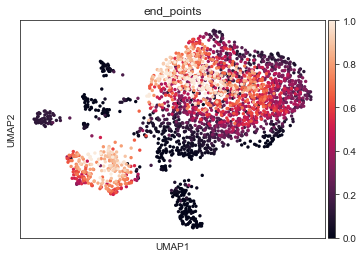

In [20]:
sc.pl.umap(adata, color="end_points")

### Velocity pseudotime

running PAGA using priors: ['velocity_pseudotime']
    finished (0:00:01) --> added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns)
    'paga/transitions_confidence', velocity transitions (adata.uns)


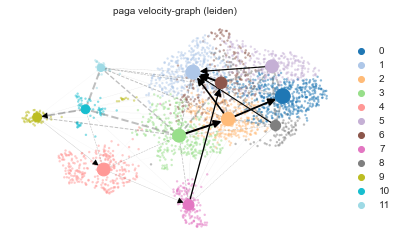

In [23]:
mb.ps.velocity_paga(adata, basis='umap')

In [24]:
adata.write_h5ad('../int/tumor/adata03.h5ad')

In [2]:
adata = sc.read_h5ad('../int/tumor/adata03.h5ad')

### Calculate plasticity using CTrP

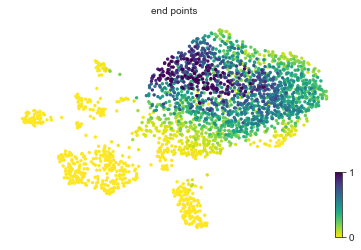

In [3]:
scv.pl.umap(adata, color = 'end_points')

In [4]:
mb.ps.ctrp(adata, self_transitions=False, adata_dist=None, groupby = 'tumor')

computing terminal states


Trying to set attribute `.obs` of view, copying.


Eigenvalues:  [0.9999995]
(2073, 1)
    identified 1 end points (Tumor 1)
Dropping absorbing rows for fundamental matrix...
(2028, 2028)
Calculating fate...
Calculating distances...
Calculating inner product...


Trying to set attribute `.obs` of view, copying.


Eigenvalues:  [1.0000046  0.99797297]
(564, 2)
    identified 2 end points (Tumor 2)
Dropping absorbing rows for fundamental matrix...
(550, 550)
Calculating fate...
Calculating distances...
Calculating inner product...


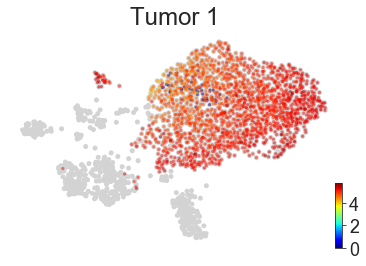

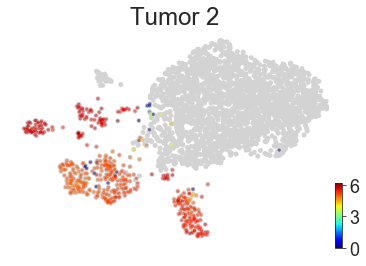

In [5]:
mb.pl.ctrp_groups(adata, groups = 'tumor', basis = 'umap')


Tumor 1 4.912190997338829
Tumor 2 5.156269653400852


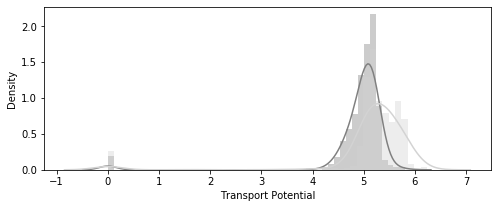

In [6]:
custom_palette = ['grey','lightgrey','#fc8d62', '#66c2a5', '#FFD43B', '#8da0cb', '#e78ac3']

mb.pl.ctrp_hist(adata, groups='tumor', bins = 50,figsize = (8,3), custom_palette=custom_palette,fname='tumor_hist_pheno')



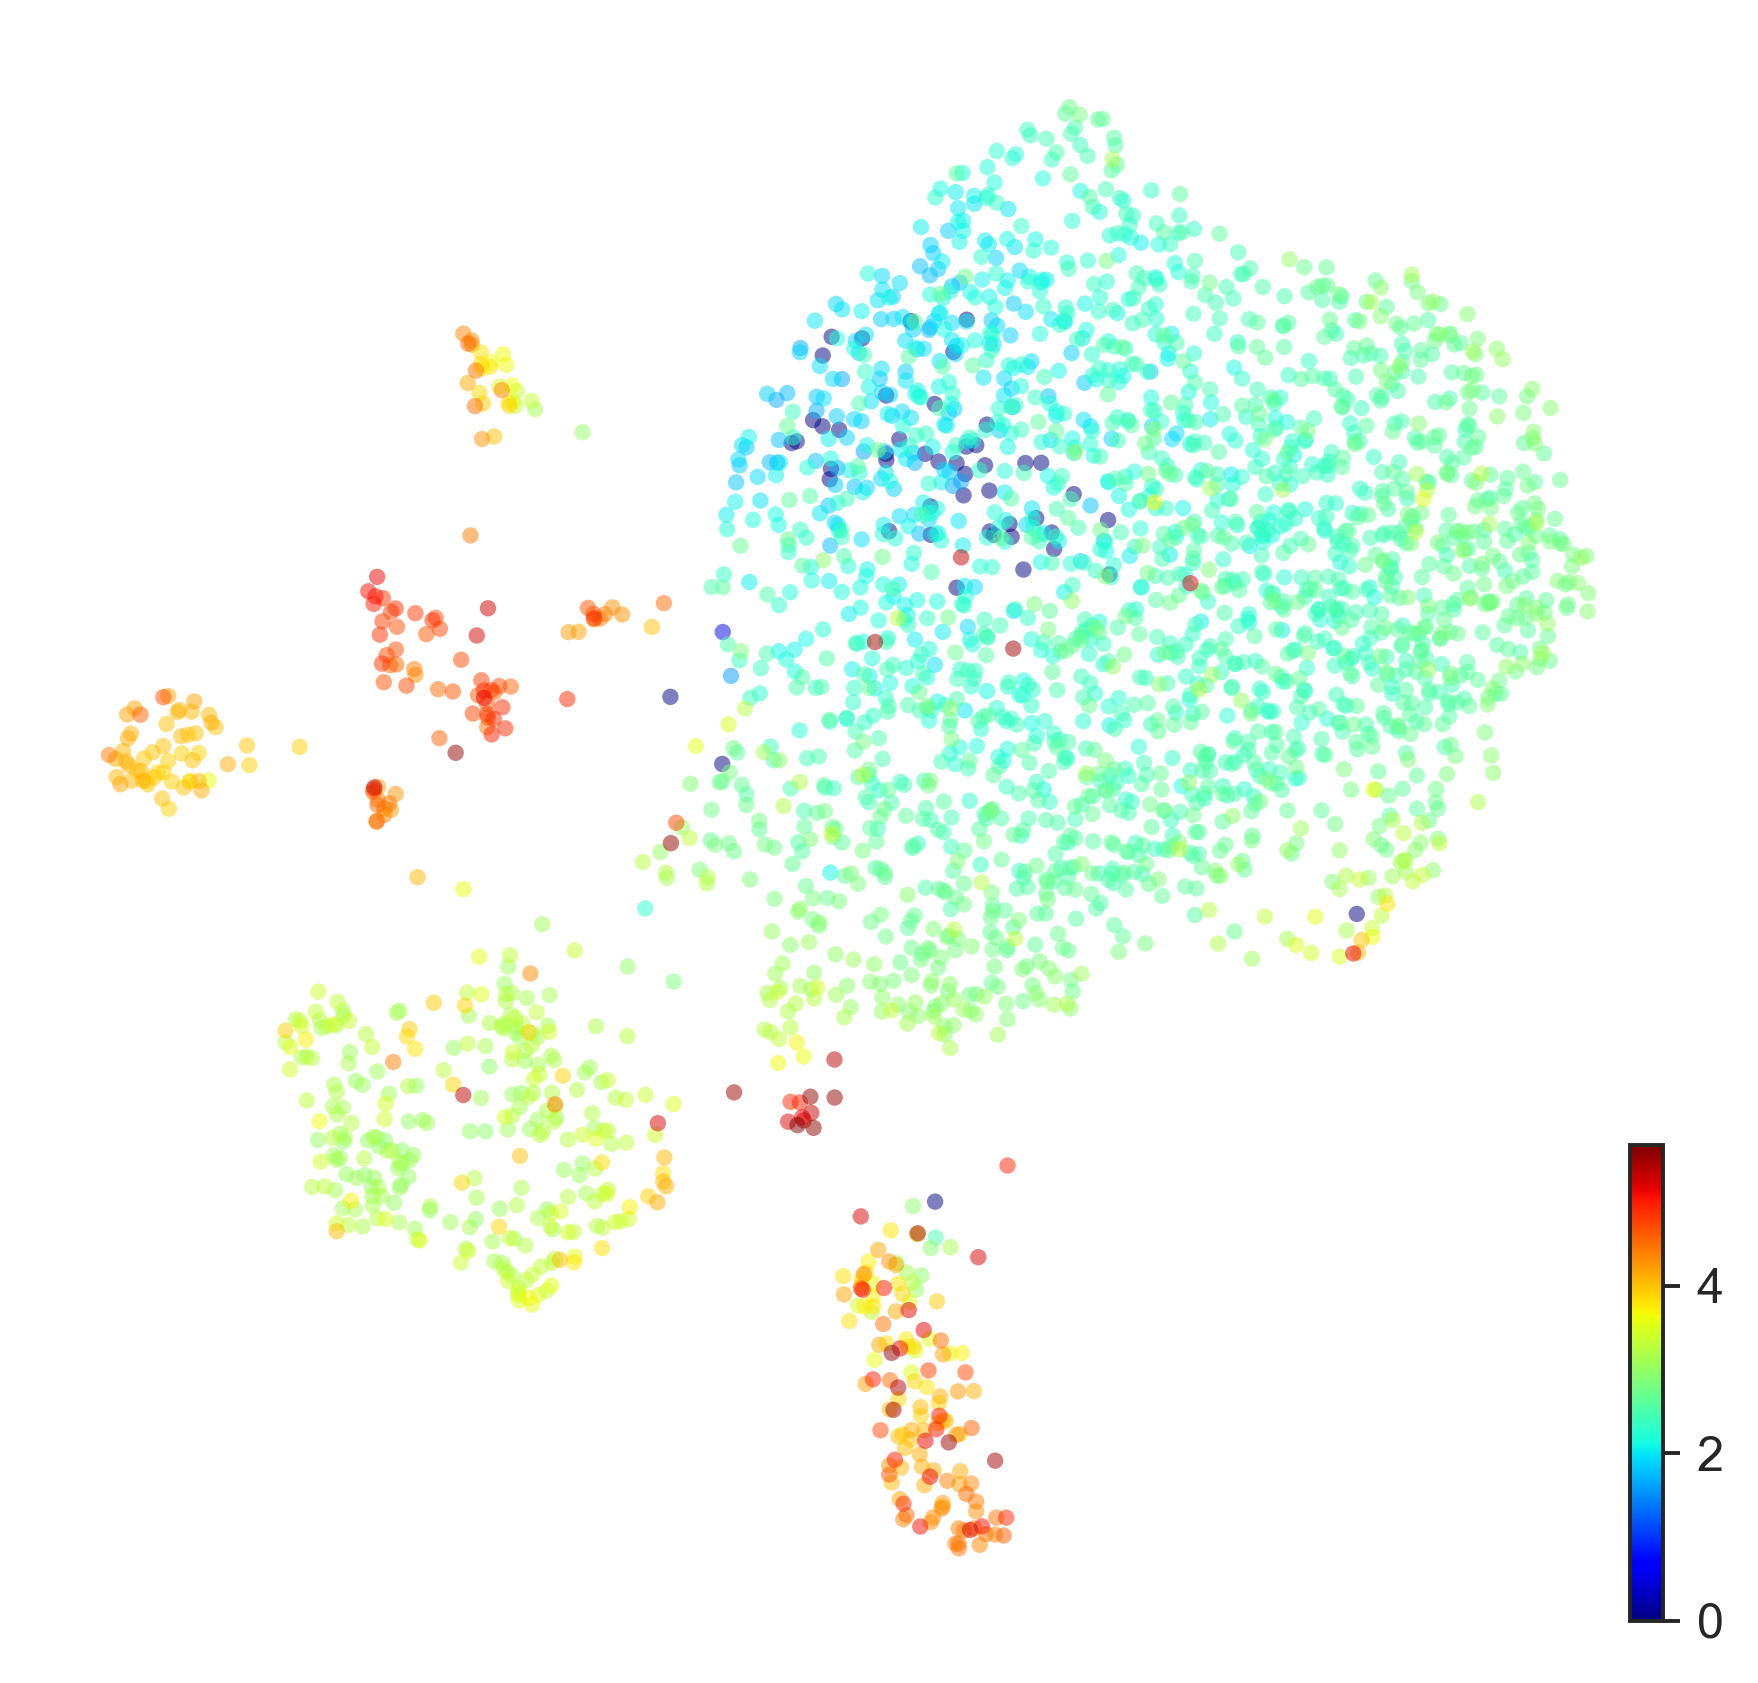

In [23]:
mb.pl.ctrp(adata, basis = 'umap')

In [34]:
adata.write_h5ad('../int/tumor/adata04.h5ad')

In [6]:
# adata = sc.read_h5ad('../int/tumor/adata04.h5ad')

# Signature Subtyping

In [3]:
sig_matrix = pd.read_csv('../data/sig_matrix_ParTI.csv', header =0, index_col = 0)



In [4]:
import mazebox as mb
import scvelo as scv
import scanpy as sc
import os.path as op
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
adata = sc.read_h5ad('../int/tumor/adata06.h5ad')
sig_matrix = pd.read_csv('../data/sig_matrix_ParTI.csv', header =0, index_col = 0)
sig_matrix = sig_matrix / np.linalg.norm(sig_matrix, axis=0)



Trying to set attribute `.obs` of view, copying.


Transforming tumor data...
Gene signature matrix now has shape:  (87, 5)
Tumor data shortened to genes in gene list...
(2584, 87)
Tumor data subsetting complete.


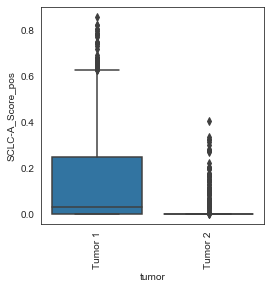

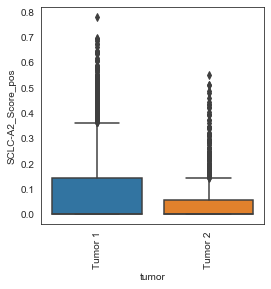

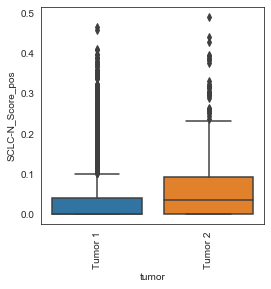

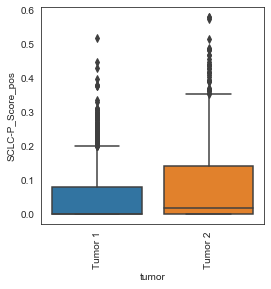

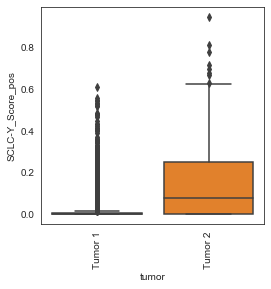

In [9]:
adata, adata_small, sig_matrix2 =mb.ar.phenotyping_recipe(adata, sig_matrix,groupby = 'tumor', save_as='human_tumors')


Index(['SCLC-A_Score', 'SCLC-P_Score', 'SCLC-N_Score'], dtype='object')


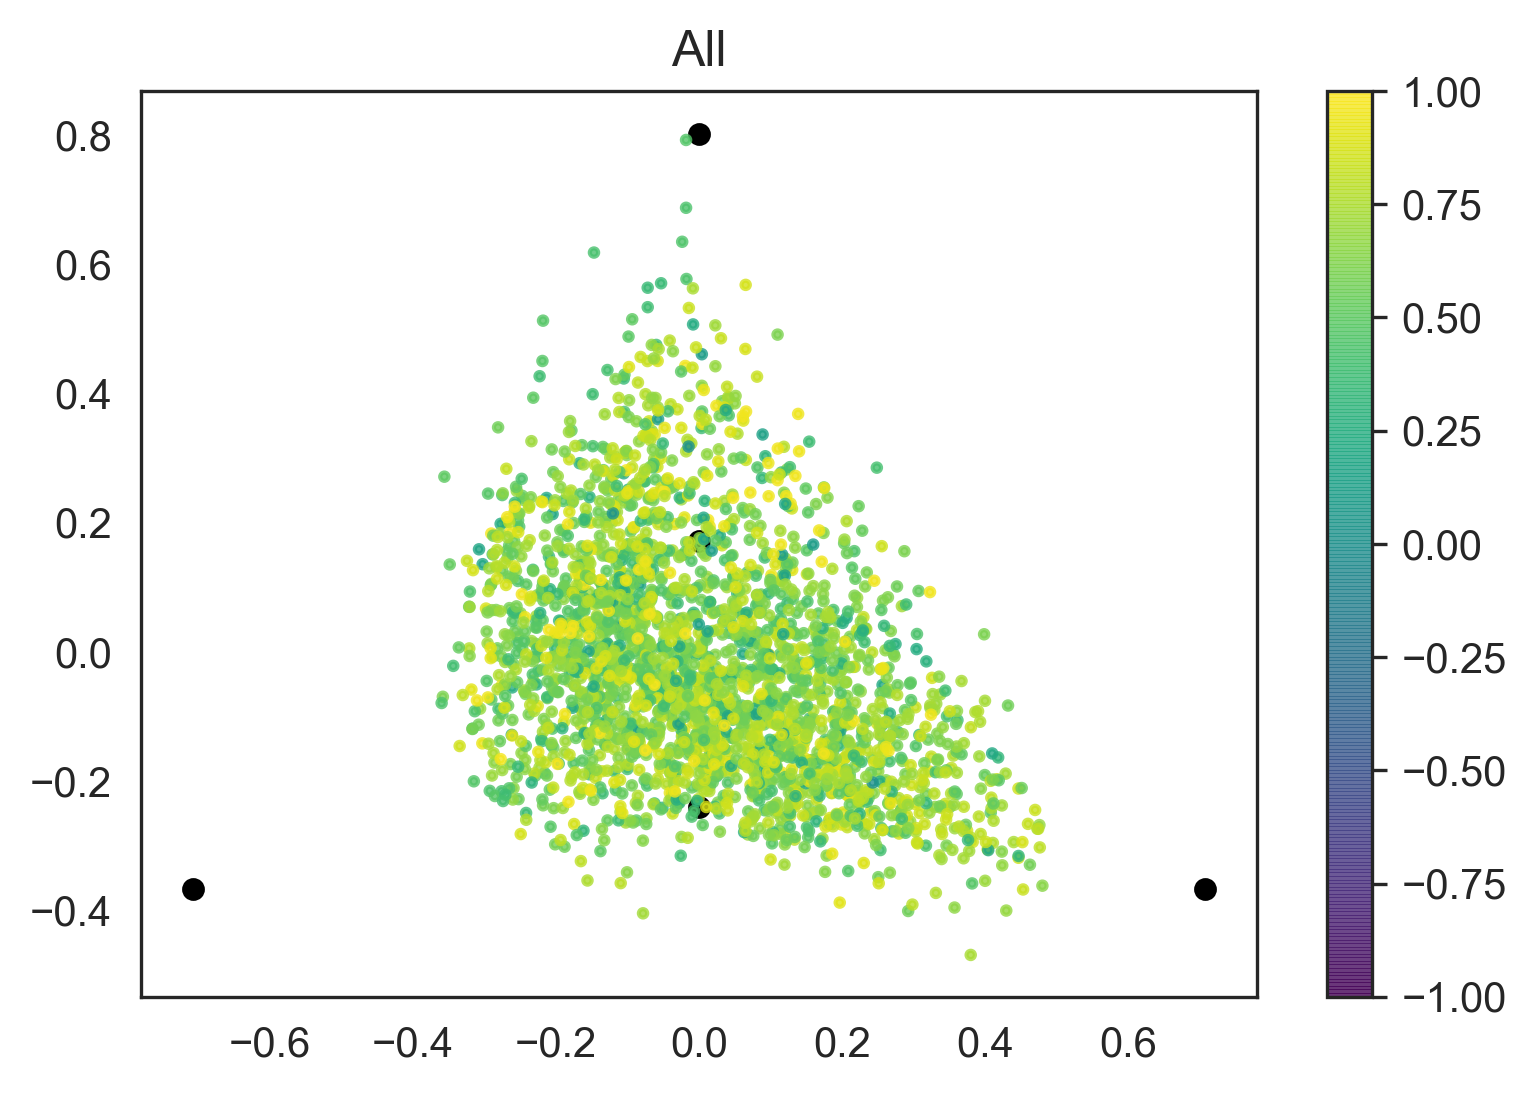

In [10]:
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 300
cp = ['#fc8d62', '#66c2a5', '#FFD43B', '#8da0cb', '#e78ac3']
color_dict = {'SCLC-Y': cp[4], 'SCLC-A': cp[0], 'SCLC-A2': cp[1], 'SCLC-N': cp[2], 'SCLC-P': cp[3],
              'Generalist': 'darkgray', 'None': 'lightgrey'}
mb.pl.archetype_diagrams(adata, sig_matrix, color_dict=color_dict, groupby='None',color='velocity_confidence',
                        order = ['SCLC-Y','SCLC-A','SCLC-P','SCLC-N','SCLC-A2'], norm = 'None',num_steps = 40,
                        multiplier=1, figsize=(6,4), score_name = '_Score', alpha = .8, s = 4, sizes = 20)



In [11]:
cp = ['#a9a9a9','#d3d3d3','#fc8d62', '#66c2a5', '#FFD43B', '#8da0cb', '#e78ac3']

In [12]:
adata.obs['Phenotype'] = adata.obs['Phenotype'].fillna("None")

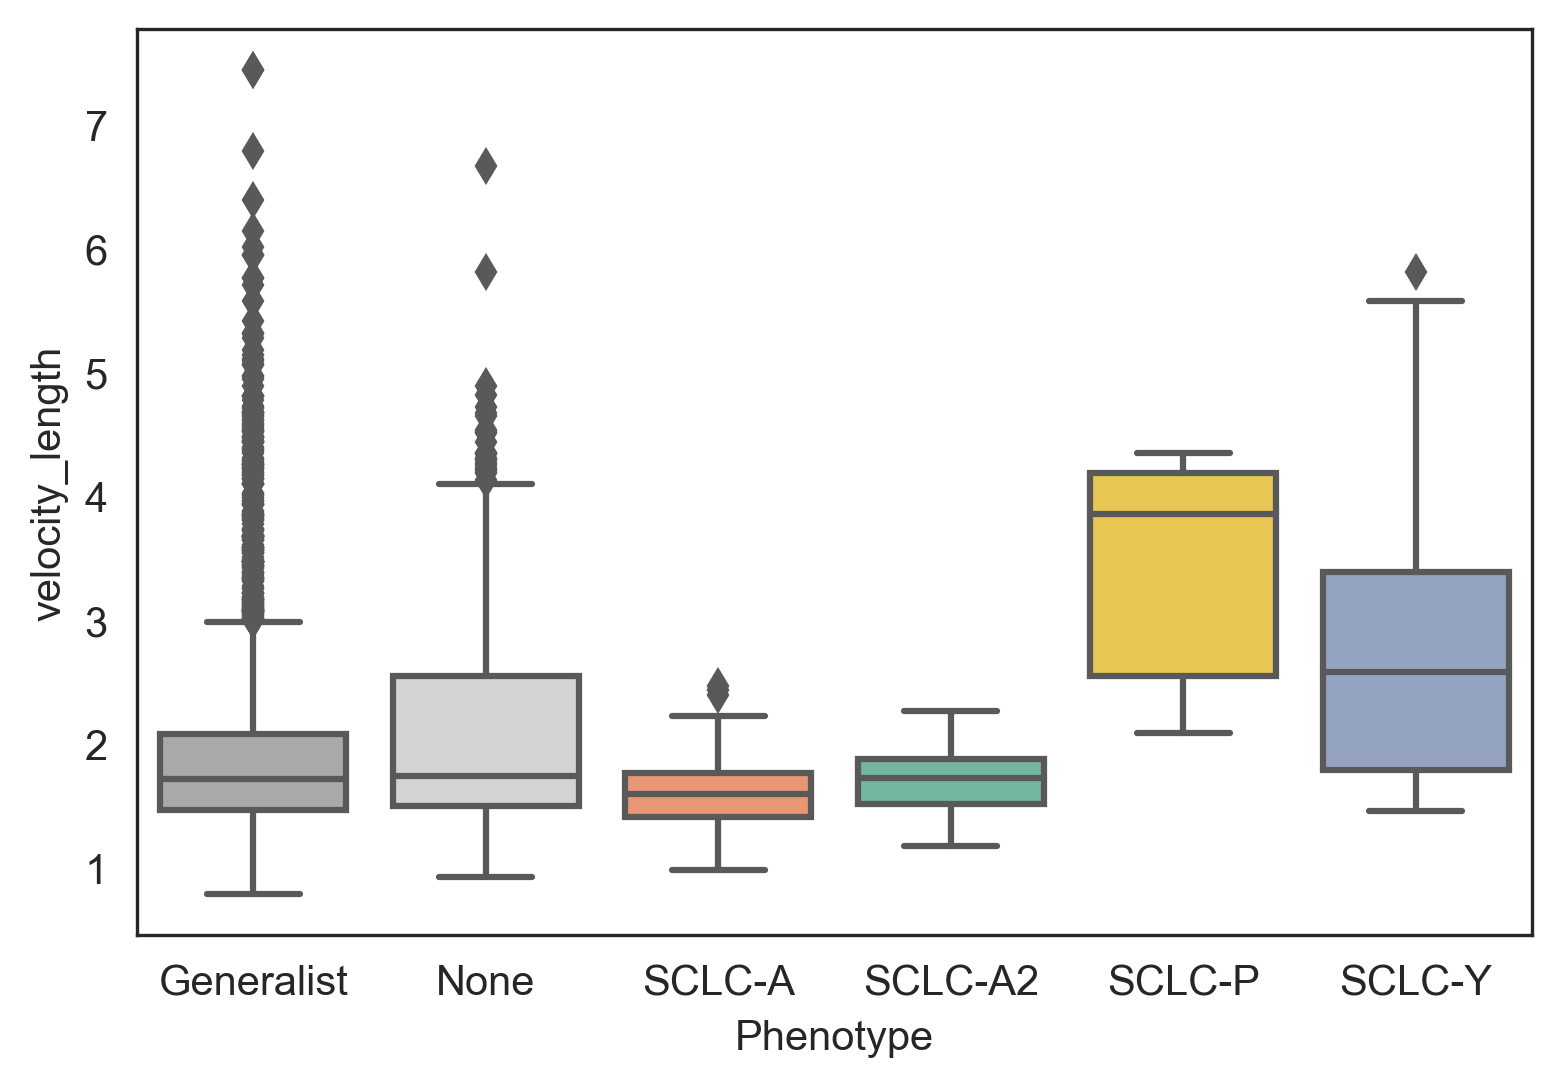

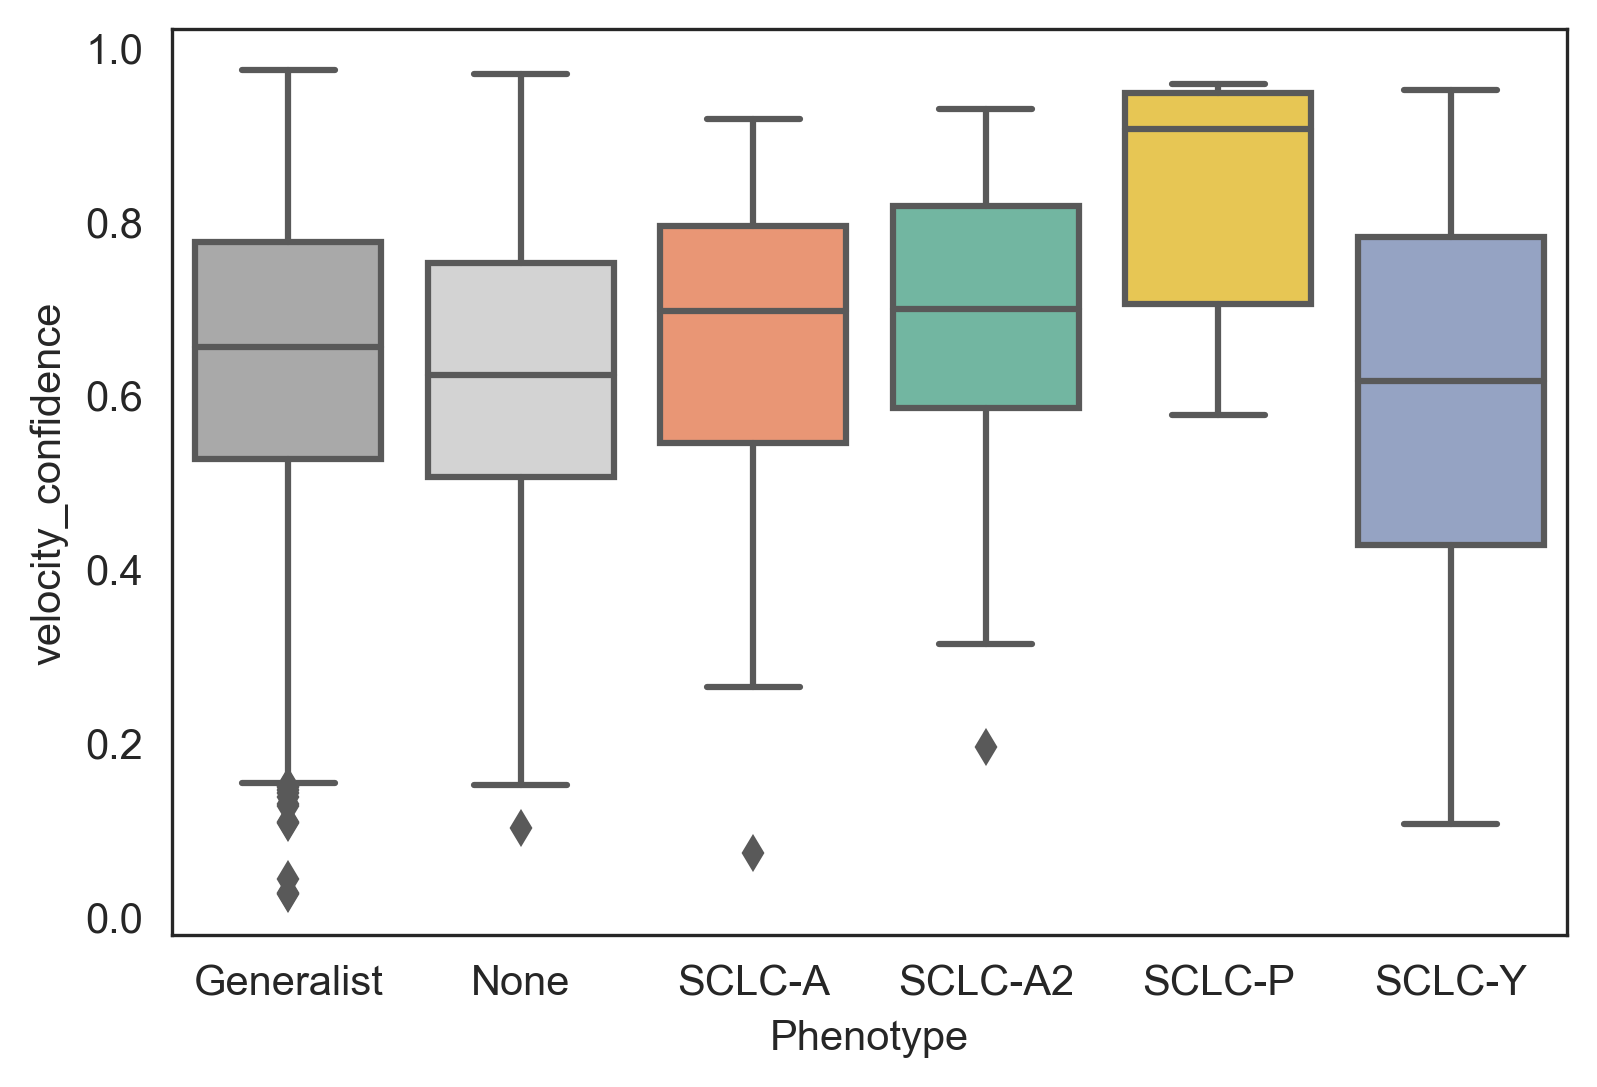

In [13]:
sns.boxplot(adata.obs['Phenotype'], adata.obs['velocity_length'], palette = cp,
           order = sorted(set(adata.obs['Phenotype'])))
plt.figure()
sns.boxplot(adata.obs['Phenotype'], adata.obs['velocity_confidence'], palette = cp,
                       order = sorted(set(adata.obs['Phenotype'])))




(array([  3.,   1.,   4.,   8.,  12.,  13.,  16.,  20.,  32.,  33.,  46.,
         68.,  71., 116., 111., 138., 144., 181., 154., 166., 165., 182.,
        159., 183., 159., 160., 114.,  77.,  39.,  62.]),
 array([0.02579825, 0.05739935, 0.08900045, 0.12060156, 0.15220266,
        0.18380376, 0.21540487, 0.24700597, 0.27860708, 0.31020818,
        0.34180928, 0.37341039, 0.40501149, 0.43661259, 0.4682137 ,
        0.4998148 , 0.5314159 , 0.56301701, 0.59461811, 0.62621922,
        0.65782032, 0.68942142, 0.72102253, 0.75262363, 0.78422473,
        0.81582584, 0.84742694, 0.87902804, 0.91062915, 0.94223025,
        0.97383136]),
 <a list of 30 Patch objects>)

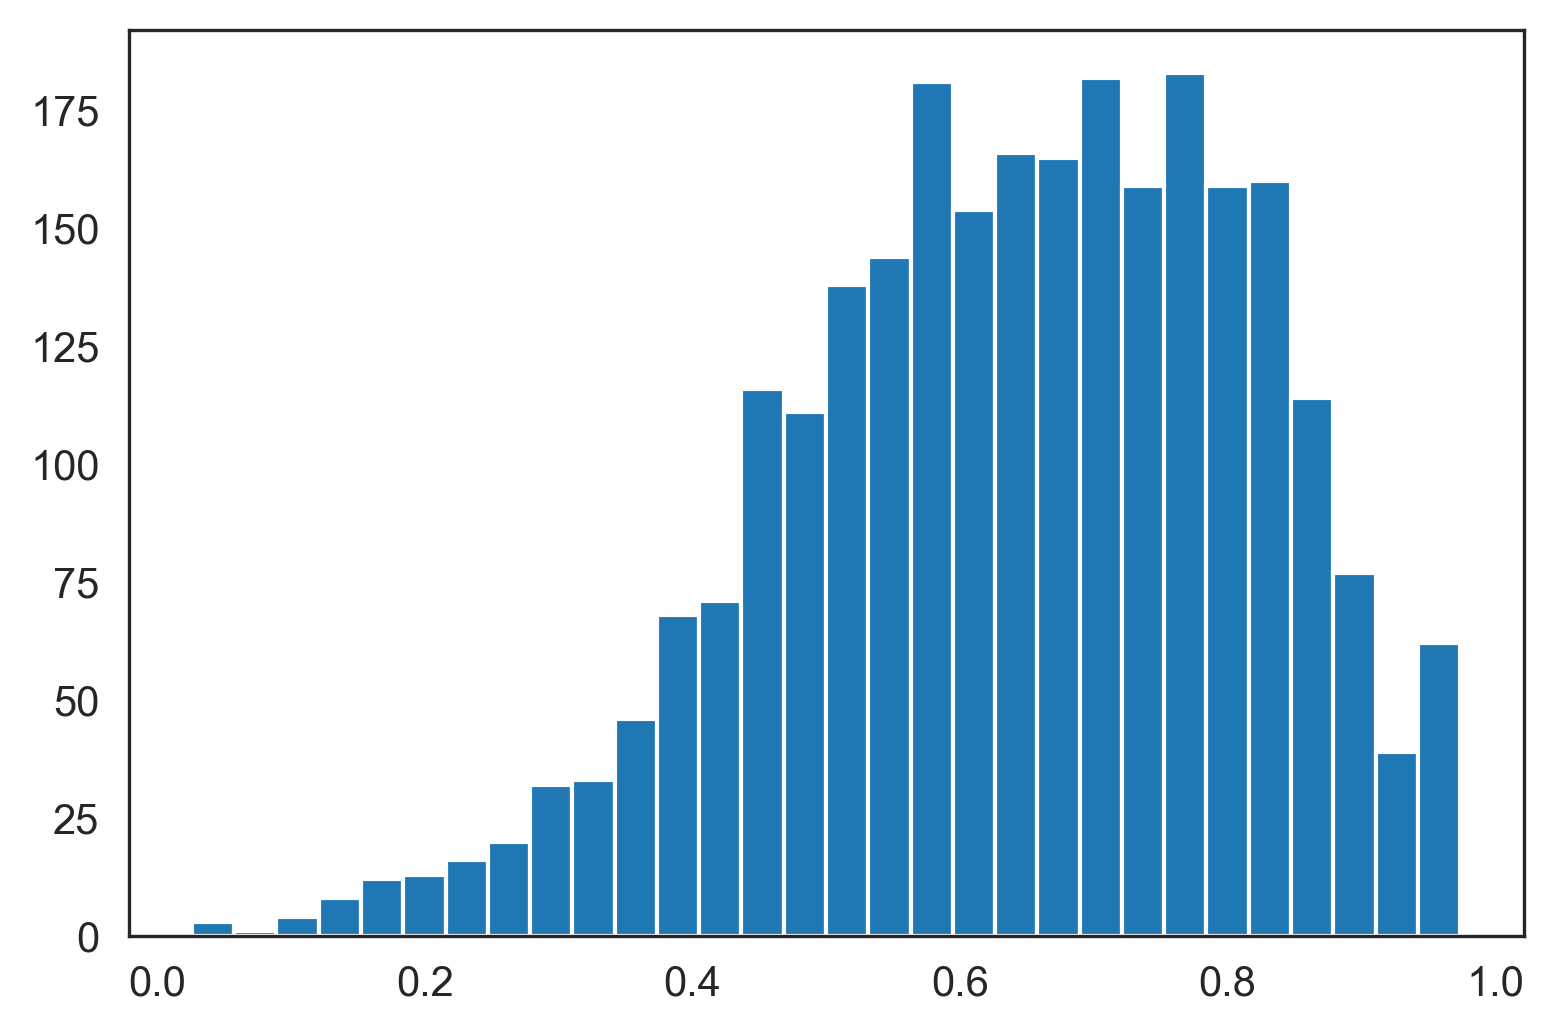

In [14]:
plt.hist(adata.obs['velocity_confidence'], bins = 30)

In [15]:
adata_small.obs['phase_score'] = adata_small.obs['G2M_score'] - adata_small.obs['S_score']

Index(['SCLC-A_Score', 'SCLC-P_Score', 'SCLC-N_Score'], dtype='object')


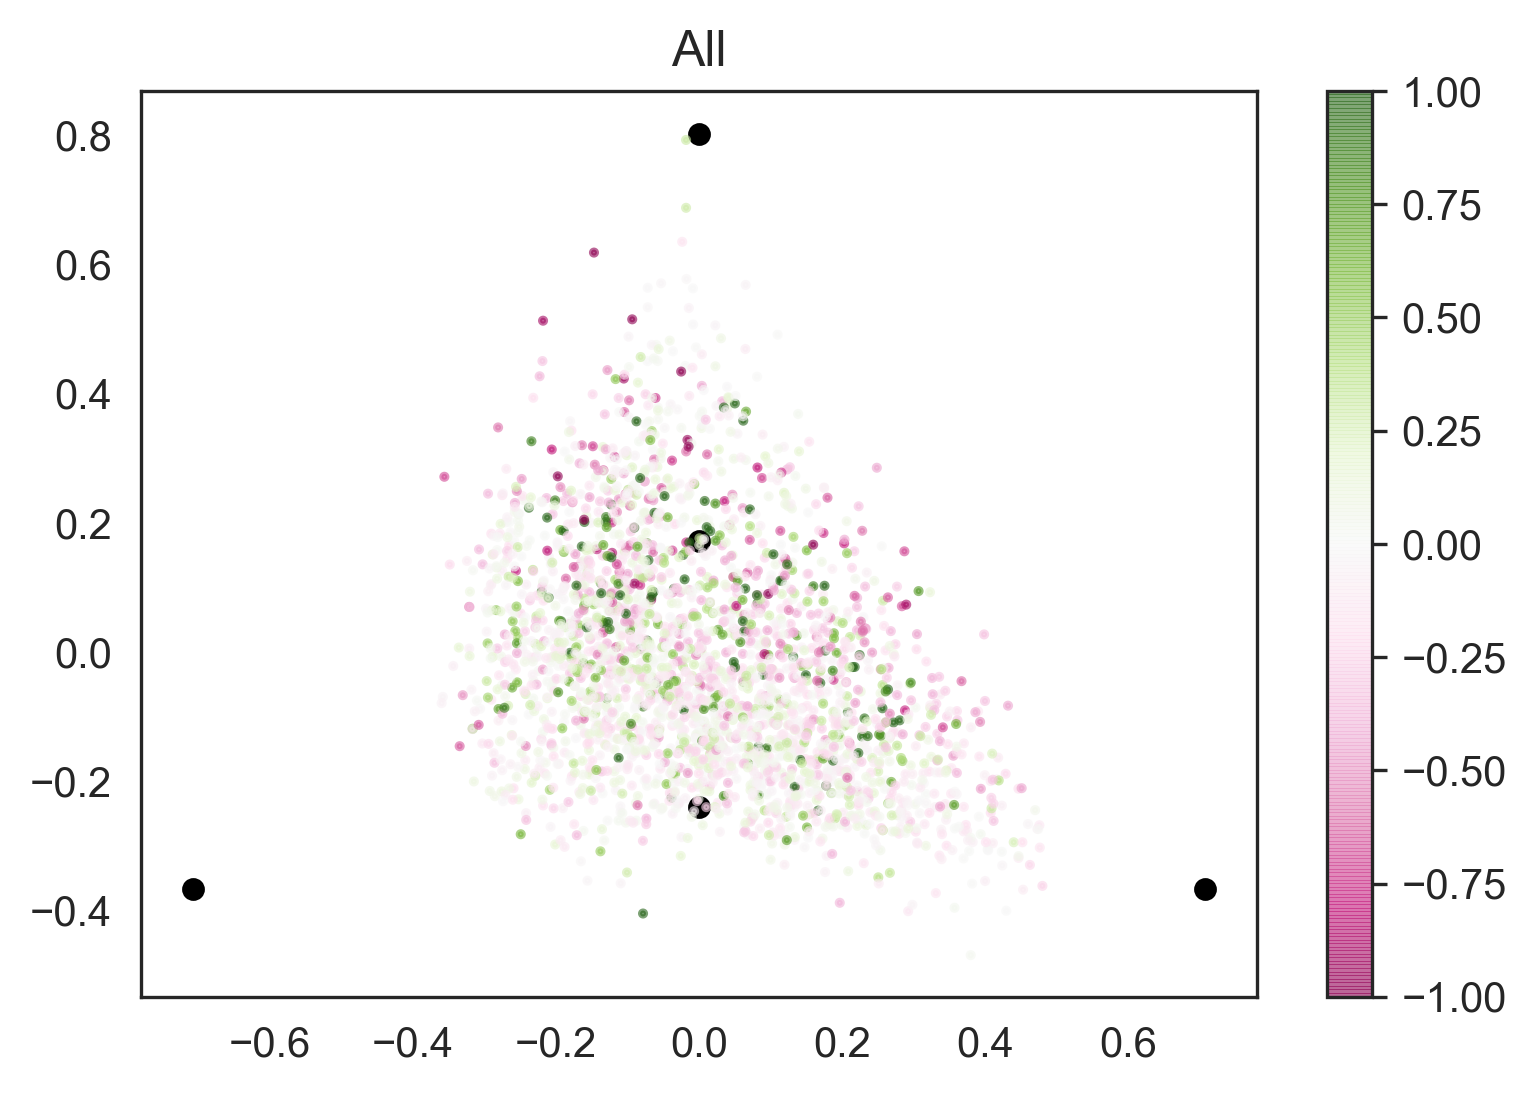

In [16]:
 import matplotlib as mpl
mpl.rcParams['figure.dpi']= 300
cp = ['#fc8d62', '#66c2a5', '#FFD43B', '#8da0cb', '#e78ac3']
color_dict = {'SCLC-Y': cp[4], 'SCLC-A': cp[0], 'SCLC-A2': cp[1], 'SCLC-N': cp[2], 'SCLC-P': cp[3],
              'Generalist': 'darkgray', 'None': 'lightgrey'}
mb.pl.archetype_diagrams(adata_small, sig_matrix, color_dict=color_dict, groupby='None',color='phase_score',grid = False,
                        order = ['SCLC-Y','SCLC-A','SCLC-P','SCLC-N','SCLC-A2'], norm = 'None',num_steps = 40,cmap = 'PiYG',
                        multiplier=1, figsize=(6,4), score_name = '_Score', alpha = .6, s = 2, sizes = 20)

Index(['SCLC-A_Score', 'SCLC-P_Score', 'SCLC-N_Score'], dtype='object')


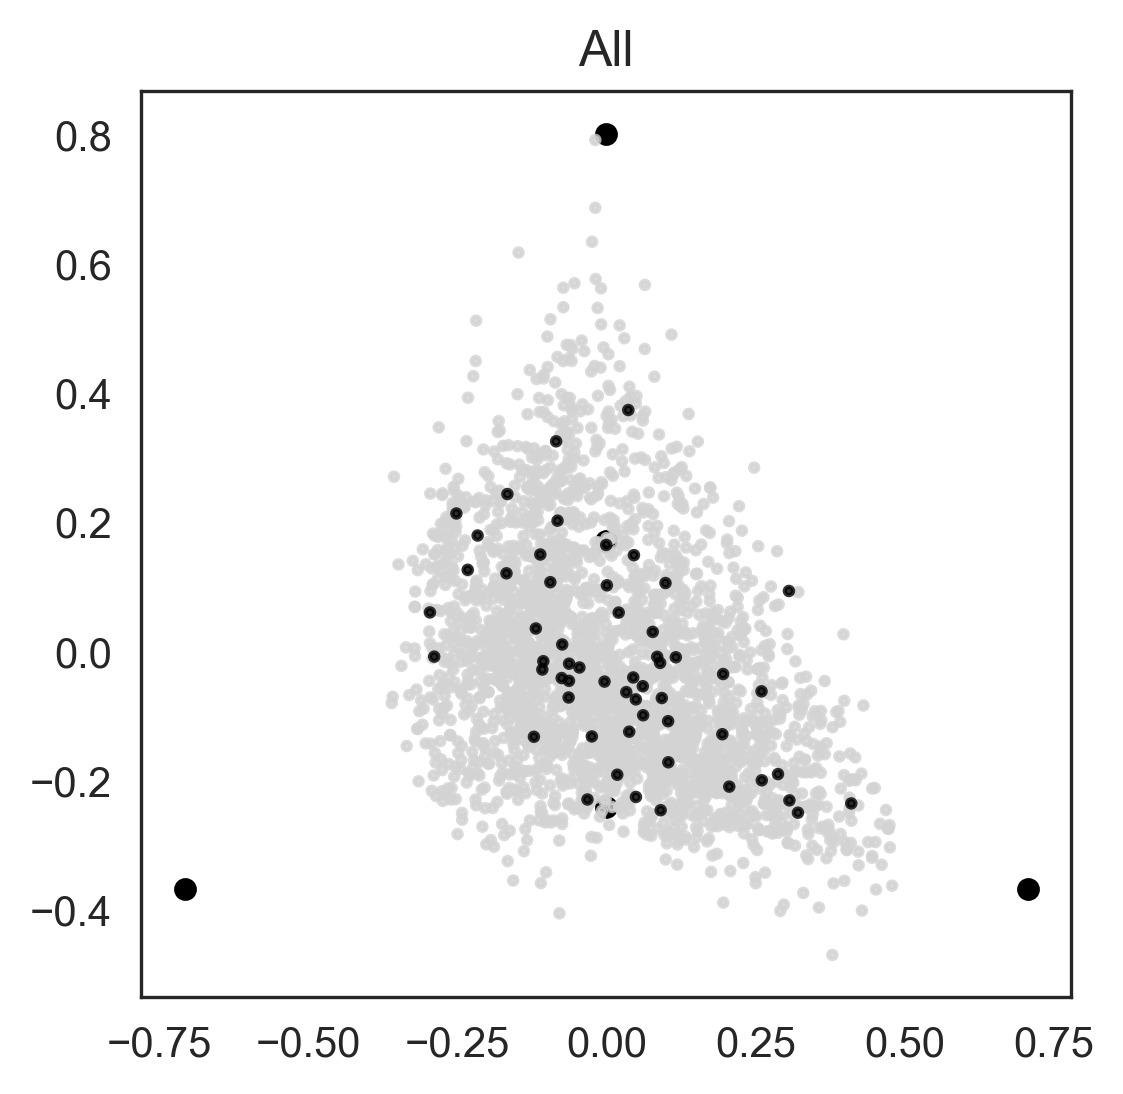

In [17]:
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 300
cp = ['#fc8d62', '#66c2a5', '#FFD43B', '#8da0cb', '#e78ac3']
color_dict = {'SCLC-Y': cp[4], 'SCLC-A': cp[0], 'SCLC-A2': cp[1], 'SCLC-N': cp[2], 'SCLC-P': cp[3],
              'Generalist': 'darkgray', 'None': 'lightgrey'}
color_dict = {'True':'black','False':'lightgrey'}

mb.pl.archetype_diagrams(adata_small, sig_matrix, color_dict=color_dict, groupby='None',color='absorbing',
                        order = ['SCLC-Y','SCLC-A','SCLC-P','SCLC-N','SCLC-A2'], norm = 'None',num_steps = 40,
                        multiplier=1, figsize=(4,4), score_name = '_Score', alpha = .8, s = 4, sizes = 20)



In [18]:
cp = ['#a9a9a9','#d3d3d3','#fc8d62', '#66c2a5', '#8da0cb', '#e78ac3'] # N: FFD43B

(<matplotlib.axes._subplots.AxesSubplot at 0x7f9b63056890>,
  <statannot.StatResult.StatResult at 0x7f9ba104c9d0>])

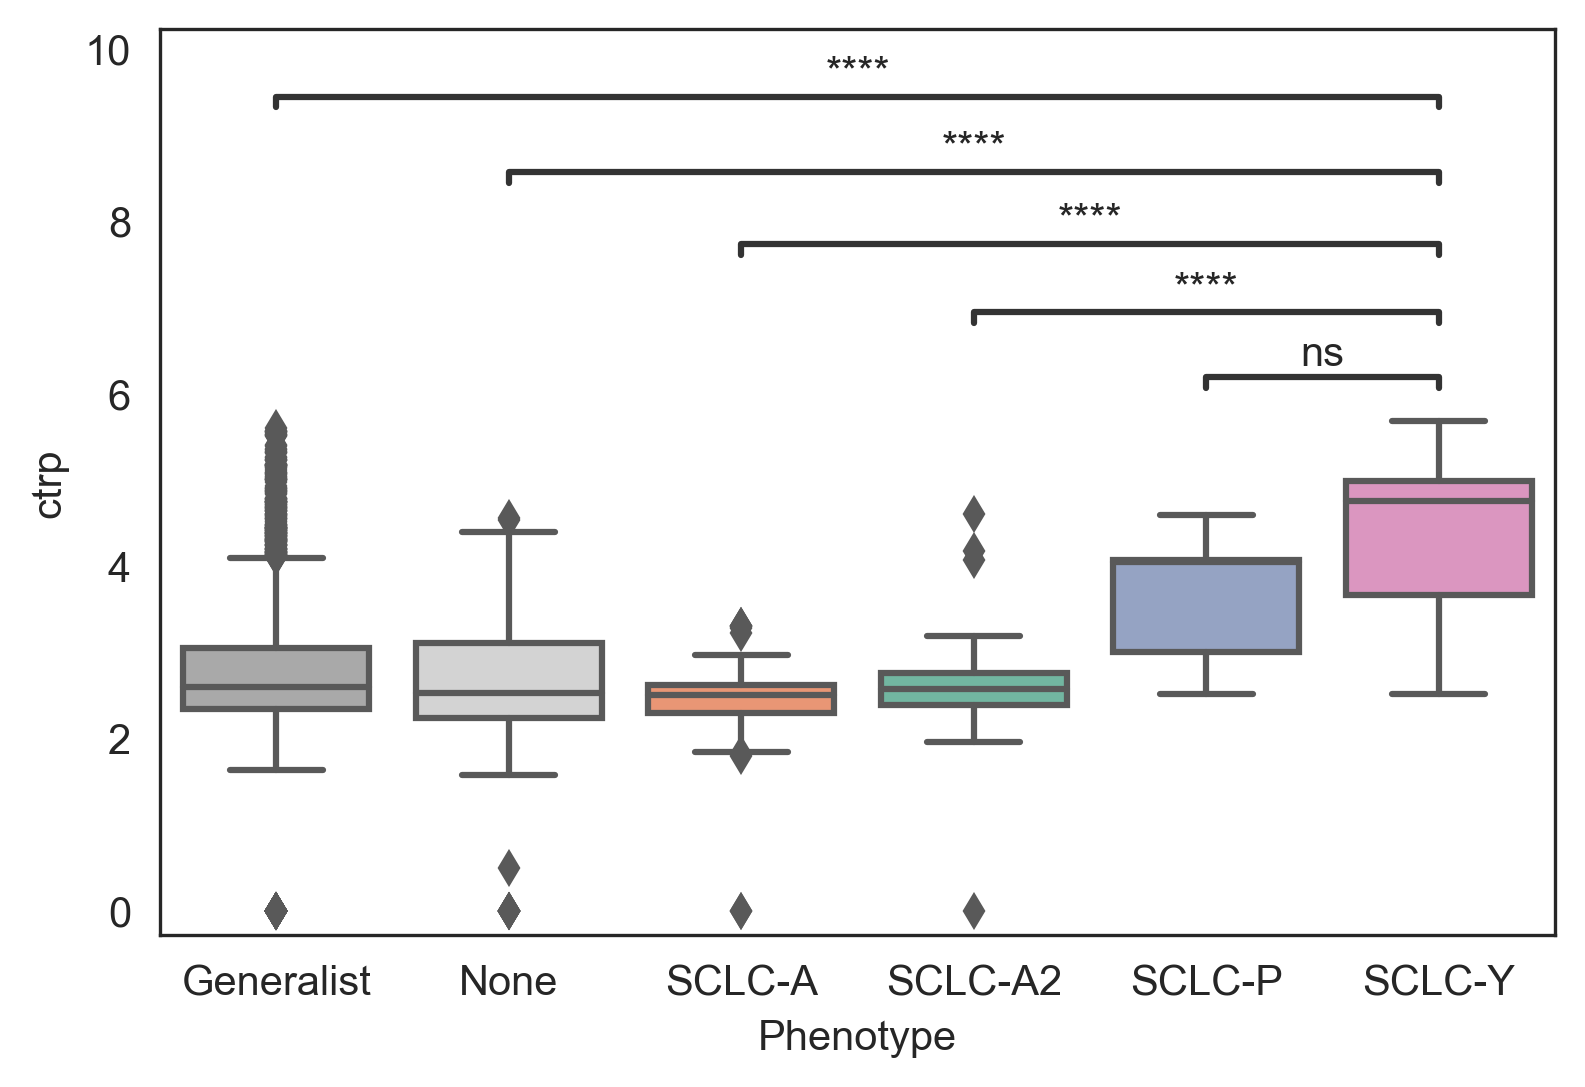

In [19]:
from statannot import add_stat_annotation

plt.figure(figsize=(6,4))
ax = sns.boxplot(data = adata.obs, x='Phenotype',y = 'ctrp',palette = cp,
                order = sorted(list(set(adata.obs['Phenotype']))))
add_stat_annotation(ax, data=adata.obs, x='Phenotype',y = 'ctrp',
                    order = sorted(list(set(adata.obs['Phenotype']))),
                    box_pairs=[('SCLC-Y','None'),
                              ('SCLC-Y','SCLC-A'), ("SCLC-Y", "SCLC-A2"),
                               ("SCLC-Y", "SCLC-P"),
                              ("Generalist", "SCLC-Y")],
                    test='Mann-Whitney', text_format='star', loc='inside', verbose=0)
# plt.savefig('./figures/ctrp_humantumor_phenotype.pdf')

Tumor 1
Index(['SCLC-A_Score', 'SCLC-A2_Score', 'SCLC-P_Score'], dtype='object')


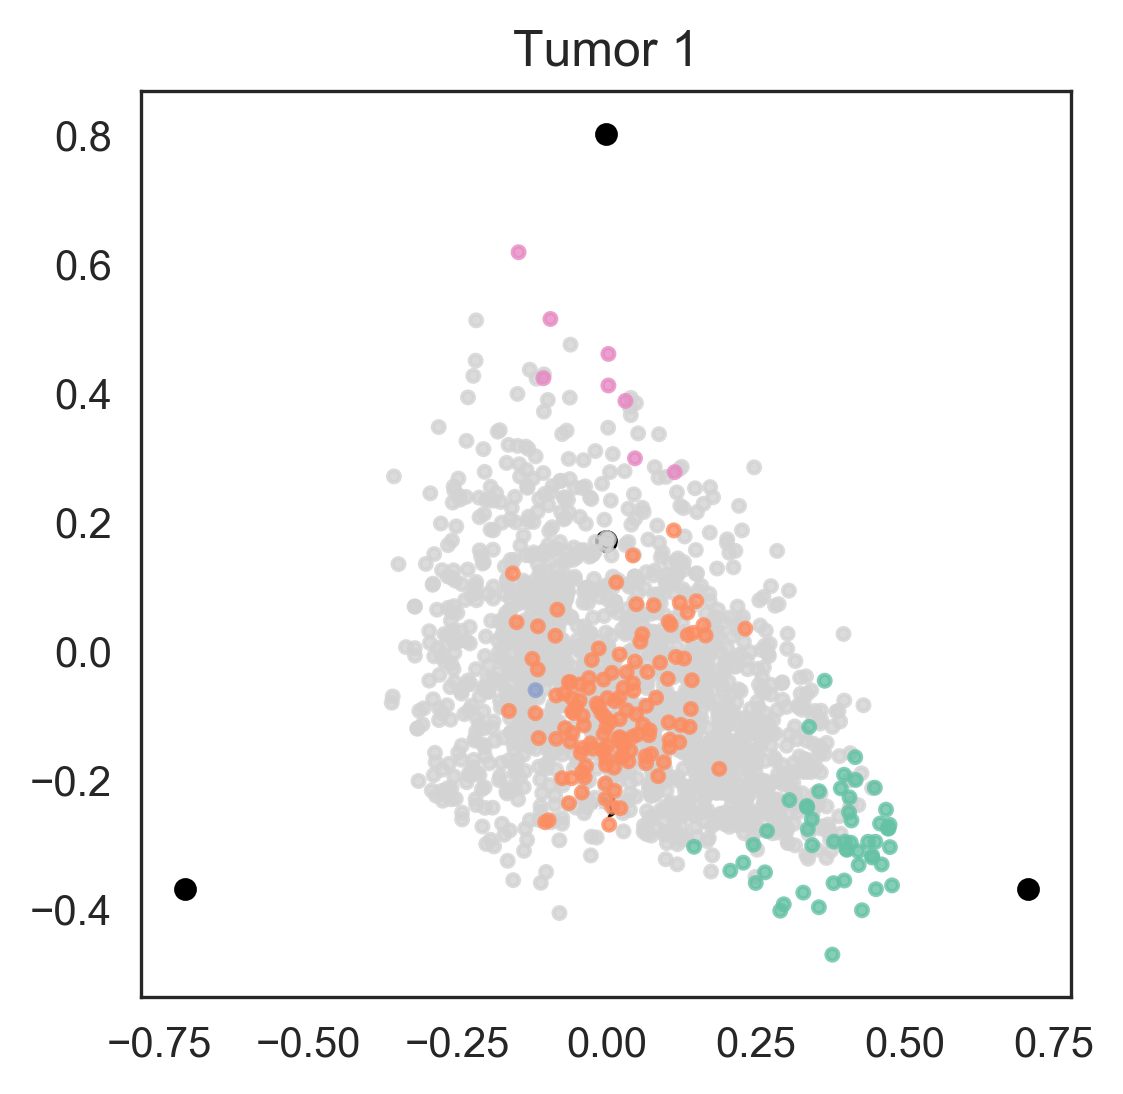

Tumor 2
Index(['SCLC-Y_Score', 'SCLC-P_Score', 'SCLC-N_Score'], dtype='object')


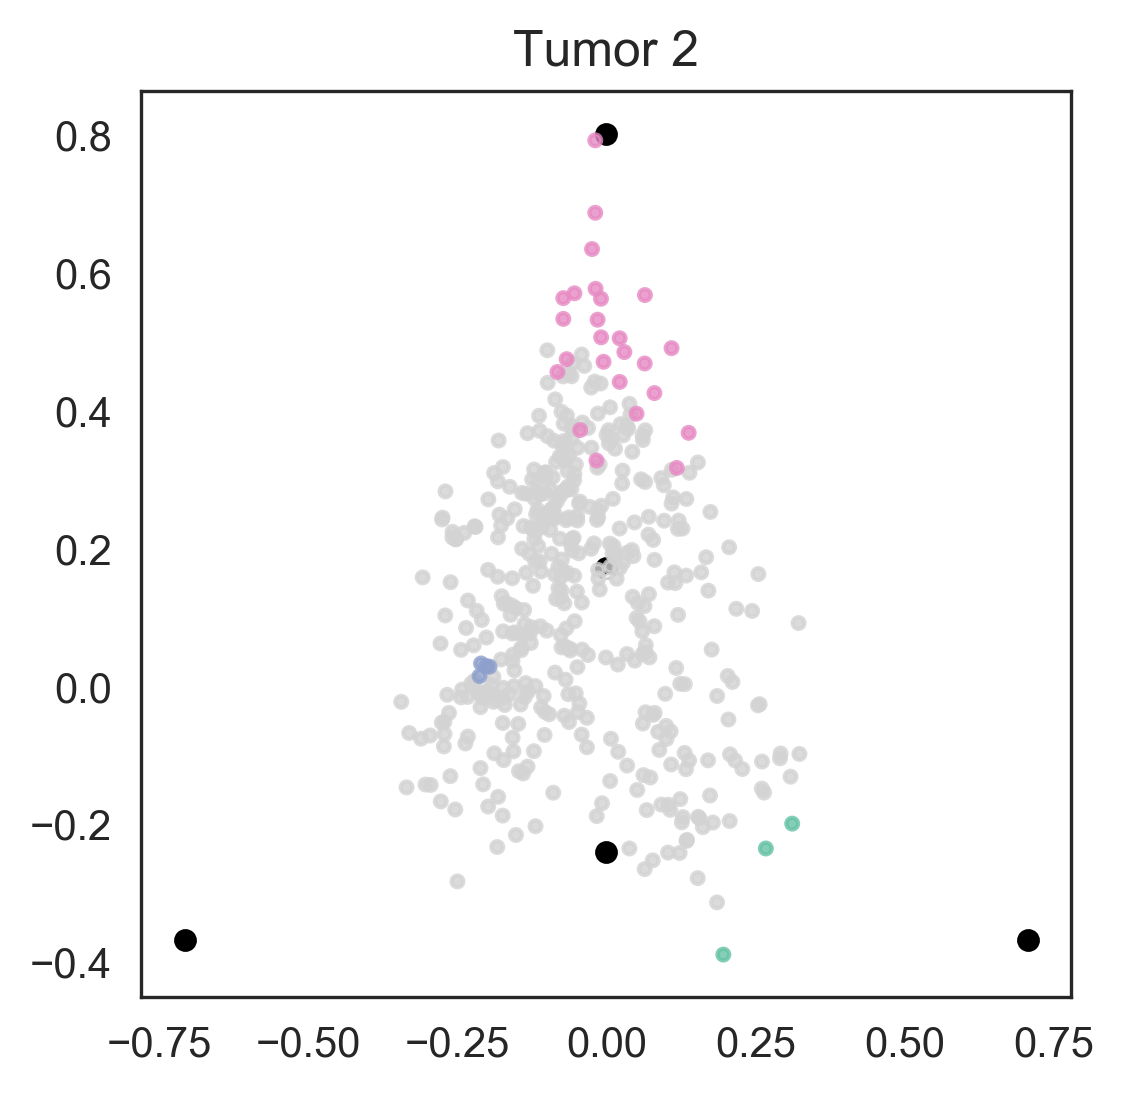

In [20]:
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 300
cp = ['#fc8d62', '#66c2a5', '#FFD43B', '#8da0cb', '#e78ac3']
color_dict = {'SCLC-Y': cp[4], 'SCLC-A': cp[0], 'SCLC-A2': cp[1], 'SCLC-N': cp[2], 'SCLC-P': cp[3],
              'Generalist': 'lightgrey', 'None': 'white'}
mb.pl.archetype_diagrams(adata_small, sig_matrix, color_dict=color_dict, groupby='tumor',color = 'Phenotype',
                        order = ['SCLC-Y','SCLC-A','SCLC-P','SCLC-N','SCLC-A2'], norm = 'None',sizes = 20,
                        figsize=(4,4), score_name = '_Score', alpha = .8, s = 8, arrows = False)



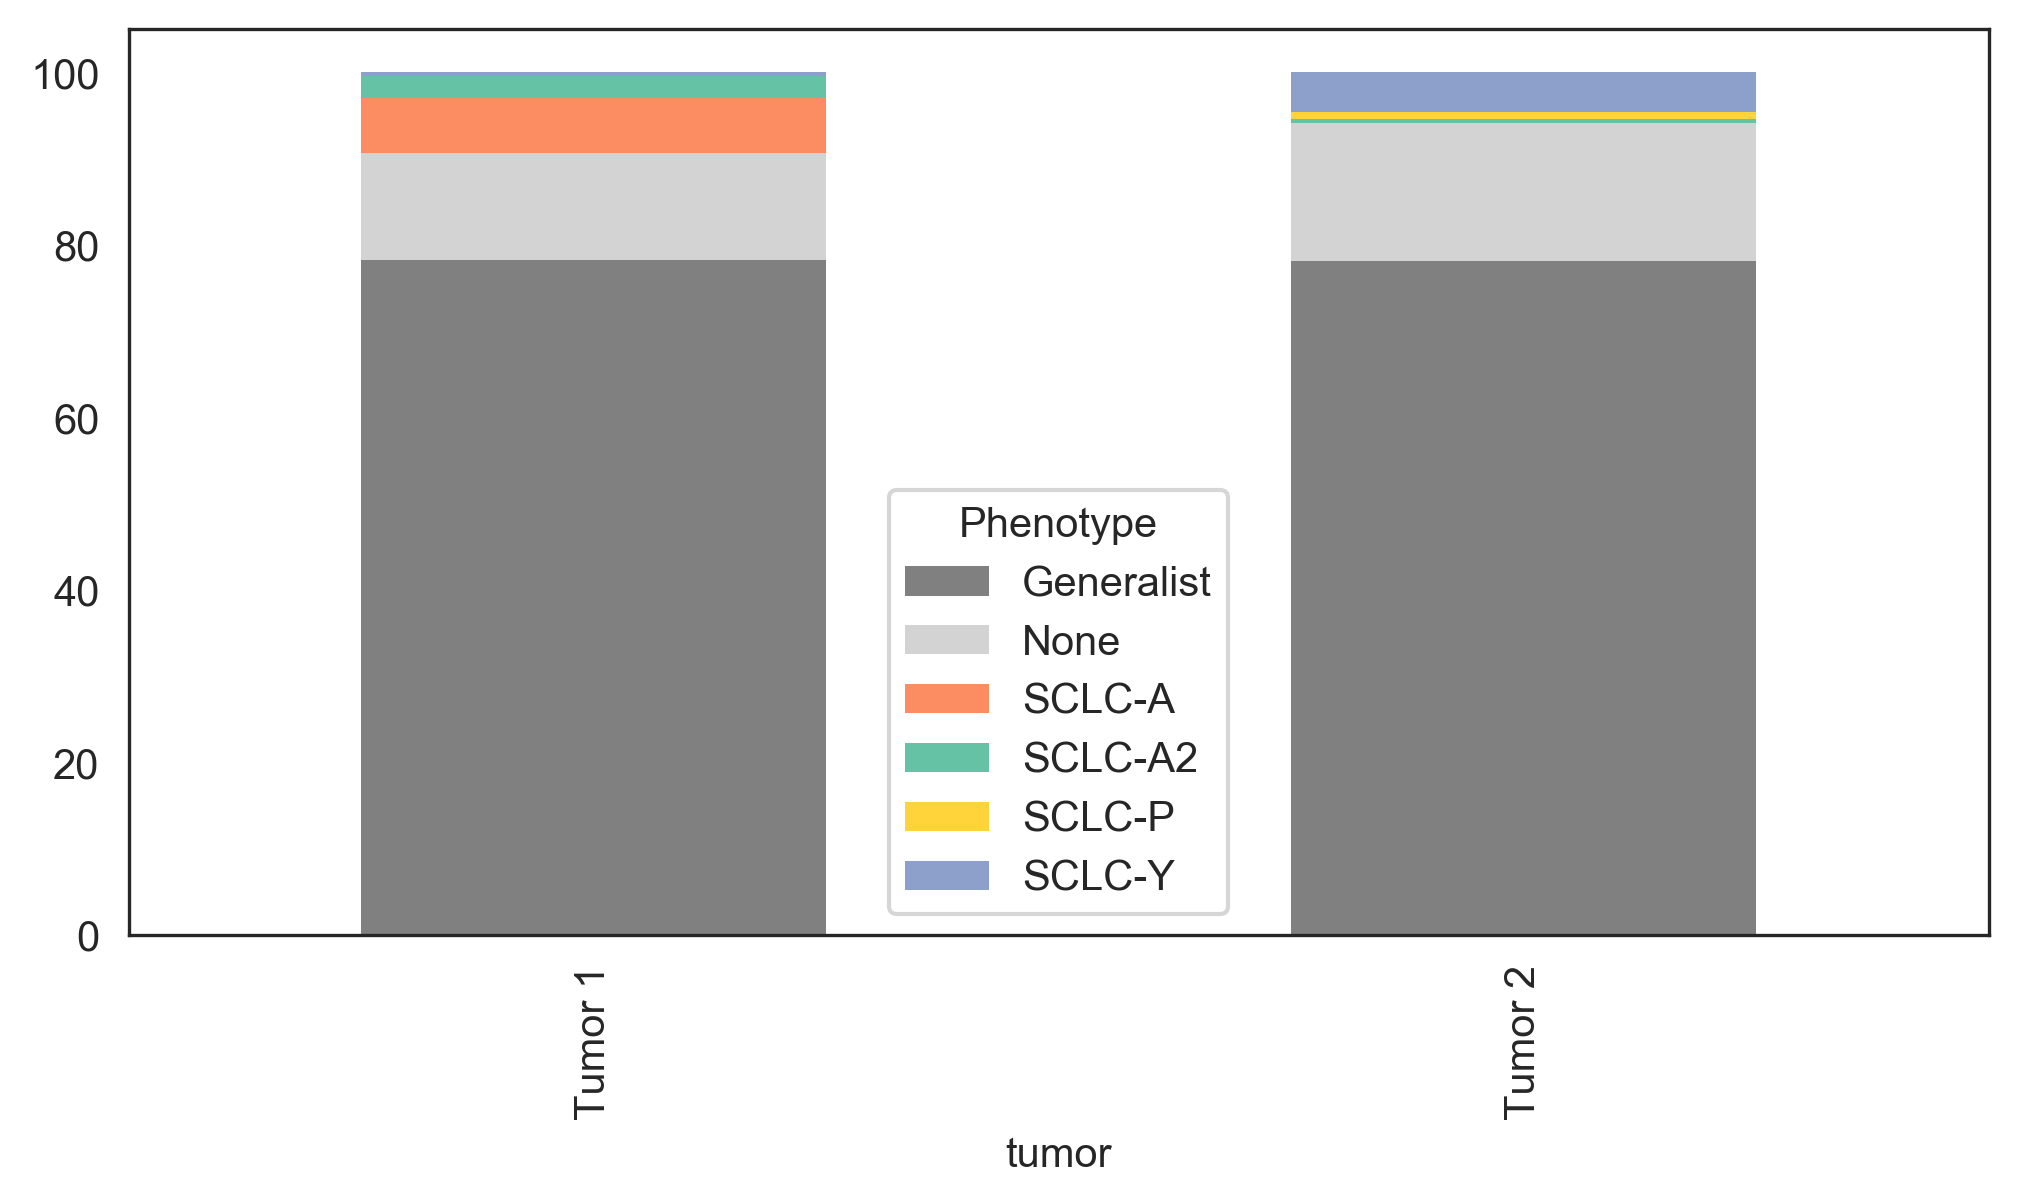

In [21]:
mb.pl.subtype_bar(adata_small,groupby='tumor', fname = 'tumor', pheno_name="Phenotype")



In [22]:
phenotype = []

df = adata.obs[[f"{x}_Score_pos" for x in ['SCLC-N', 'SCLC-A', 'SCLC-P', 'SCLC-Y', 'SCLC-A2']]]

for i, r in df.iterrows():
    test = r * (r > 0)
    if test.max() < .1:
        phenotype.append('Unclassified')

    elif test.max() > .5:
        #     if (test/test.sum()).max()>.9:
        phenotype.append(r.idxmax().split('_')[0])
    else:
        phenotype.append(r.sort_values(ascending=False)[0:2].sort_index().index[0].split('_')[0]+"_"+r.sort_values(ascending=False)[0:2].sort_index().index[1].split('_')[0])


In [23]:
adata.obs['Phenotype_extended'] = phenotype

In [24]:
pd.crosstab( adata.obs['Phenotype'],adata.obs['Phenotype_extended']).style.background_gradient(cmap='viridis')

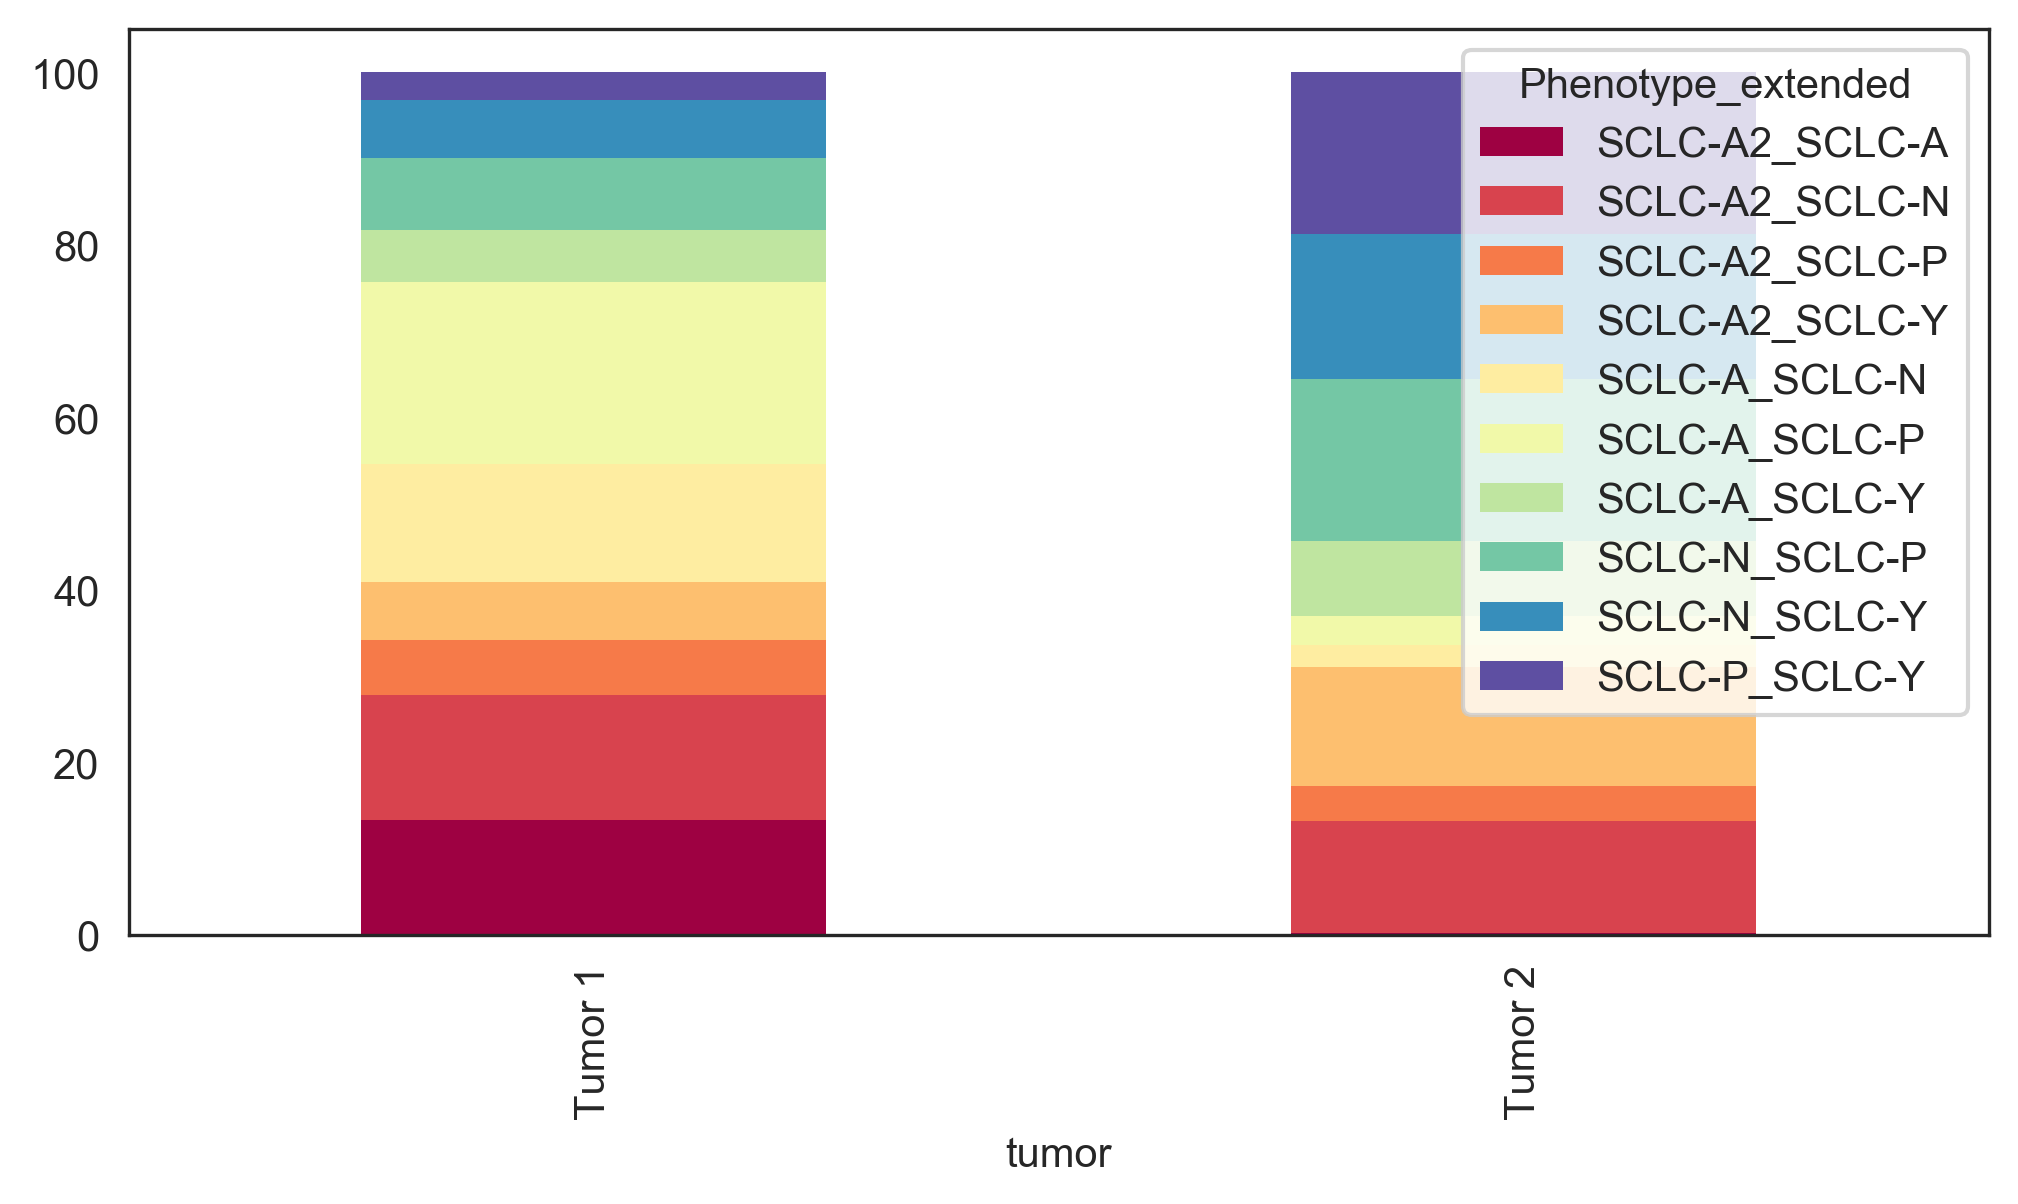

In [25]:
_adata = adata[adata.obs['Phenotype'] == 'Generalist']
plt.rcParams["figure.figsize"] = [8, 4]
((pd.crosstab(_adata.obs["tumor"], _adata.obs['Phenotype_extended']).T /
  pd.crosstab(_adata.obs["tumor"], _adata.obs['Phenotype_extended']).sum(axis=1)) * 100).T.plot(kind='bar',
                                                                                              stacked=True,
                                                                                              linewidth=0, cmap = 'Spectral')


## Newer phenotype classification with labeled generalists
Let's check to see how many samples have significant scores (p>.3) for more than one phenotype.

<BarContainer object of 3 artists>

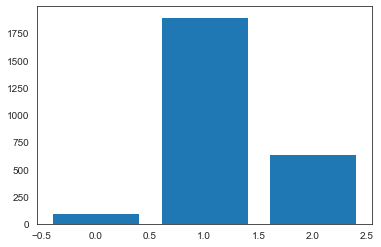

In [76]:
df = adata.obs[[f"{x}_Score_pos" for x in ['SCLC-N', 'SCLC-A', 'SCLC-P', 'SCLC-Y', 'SCLC-A2']]]
# np.unique((df > .3).sum(axis = 1), return_counts=True)[1]
plt.bar(height = np.unique(((df.T/df.sum(axis = 1)).T > .33).sum(axis = 1), return_counts=True)[1], x = range(3), log=False)

In [40]:
arc_pheno = []
arc_aa_type = []

for i,r in df.iterrows():
    r = r/r.sum()
    if (r > .33).sum() > 1:
        arc_aa_type.append('Generalist')
        arc_pheno.append(r.sort_values(ascending=False)[0:2].sort_index().index[0].split('_')[0]+"_"+r.sort_values(ascending=False)[0:2].sort_index().index[1].split('_')[0])
    elif  (r > .33).sum() == 1:
        try:
            arc_aa_type.append(r.idxmax().split('_')[0]+" Specialist")
            arc_pheno.append(r.idxmax().split('_')[0])
        except AttributeError: 
            arc_aa_type.append("Unclassified")
            arc_pheno.append("Unclassified")
    else: 
        arc_aa_type.append("Unclassified")
        arc_pheno.append("Unclassified")
adata.obs['arc_pheno'] = arc_pheno
adata.obs['arc_aa_type'] = arc_aa_type


In [41]:
pd.crosstab(adata.obs['arc_pheno'],adata.obs['tumor']).style.background_gradient(cmap='viridis')

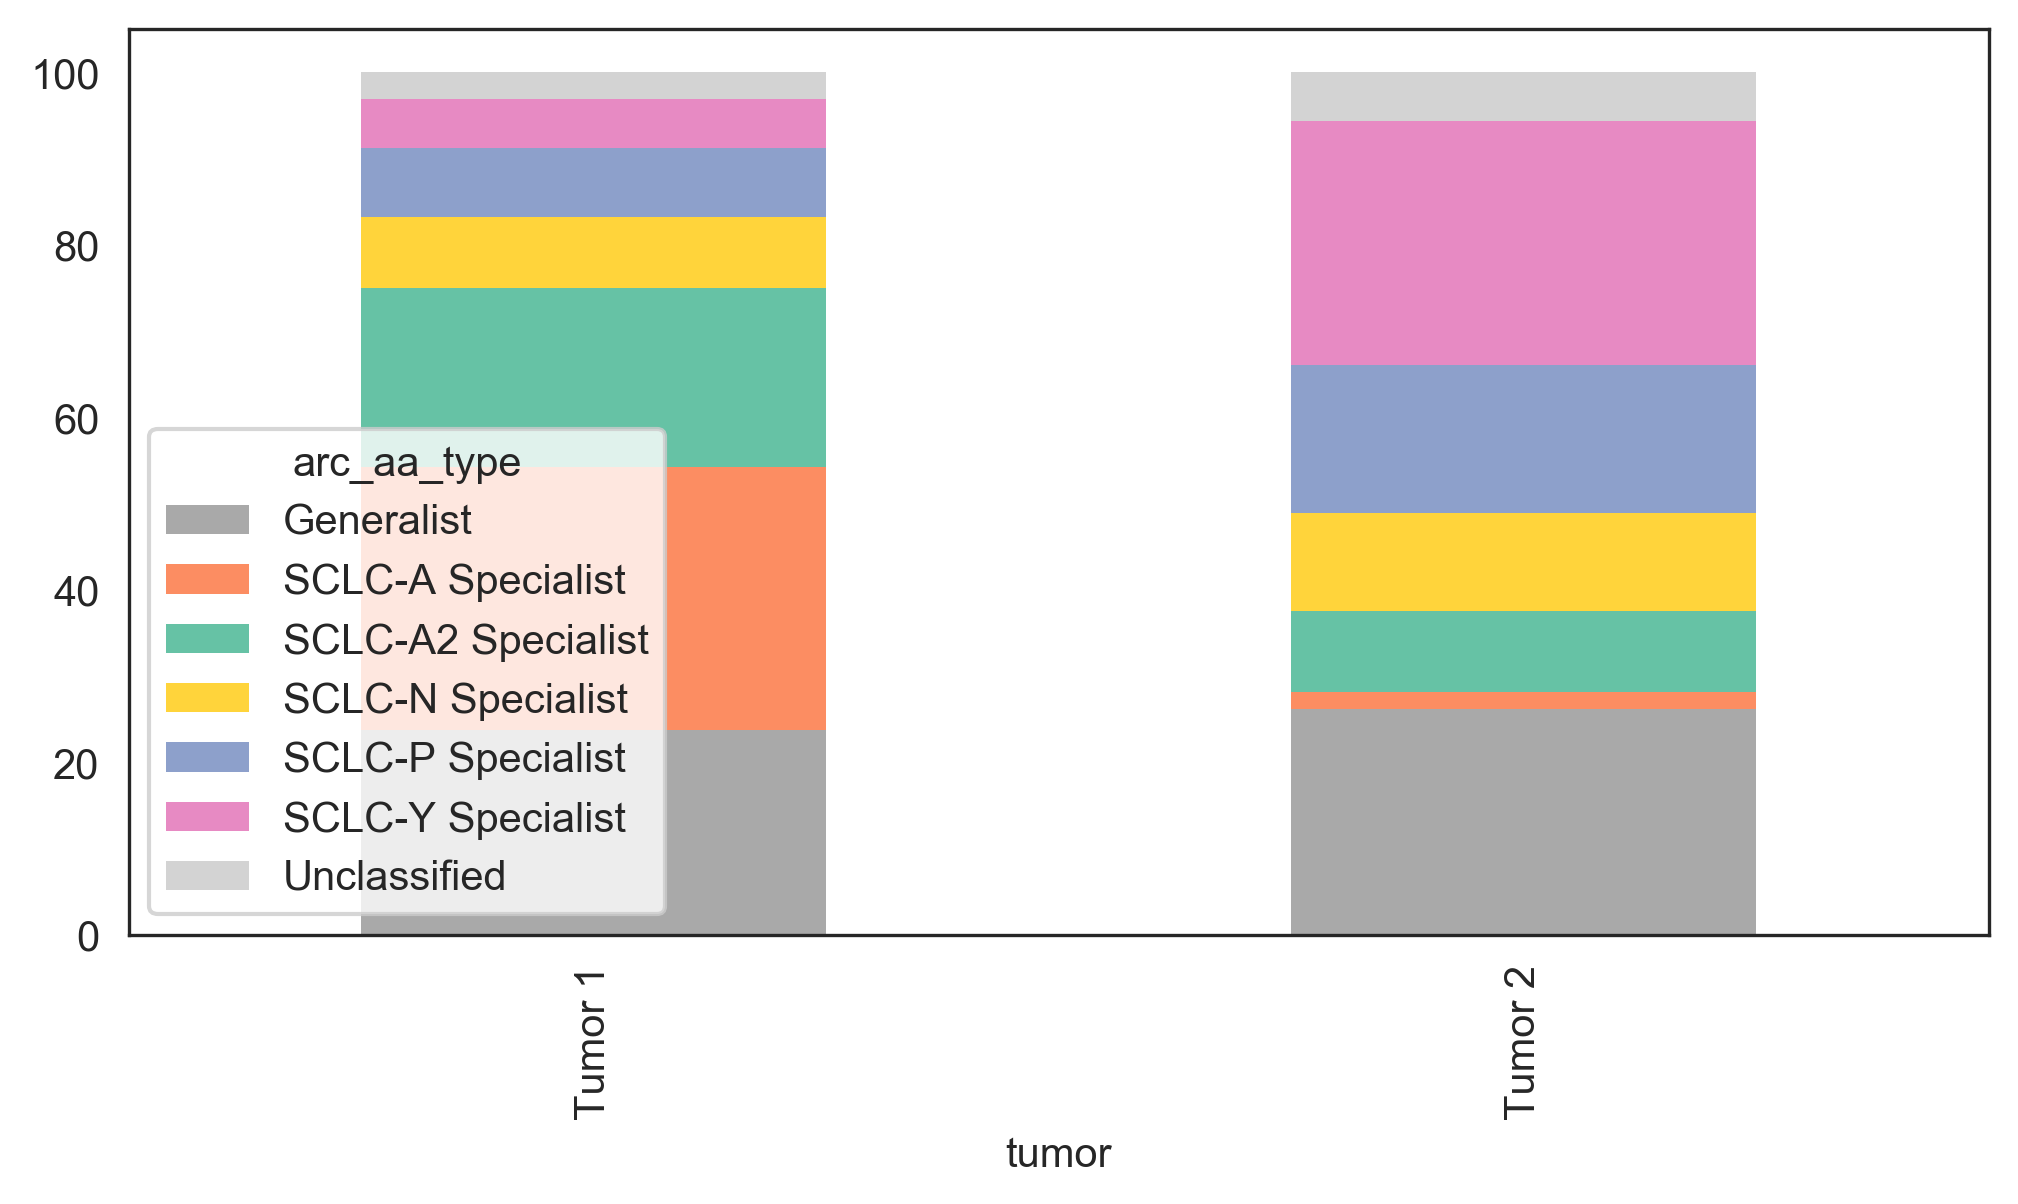

In [42]:
cp = ['#fc8d62', '#66c2a5', '#FFD43B', '#8da0cb', '#e78ac3']
color_dict = {'SCLC-Y Specialist': cp[4], 'SCLC-A Specialist': cp[0], 'SCLC-A2 Specialist': cp[1], 'SCLC-N Specialist': cp[2], 'SCLC-P Specialist': cp[3],
              'Generalist': 'darkgrey', 'Unclassified': 'lightgrey'}
mb.pl.subtype_bar(adata,groupby='tumor', fname = 'tumor', pheno_name="arc_aa_type", custom_palette=color_dict)

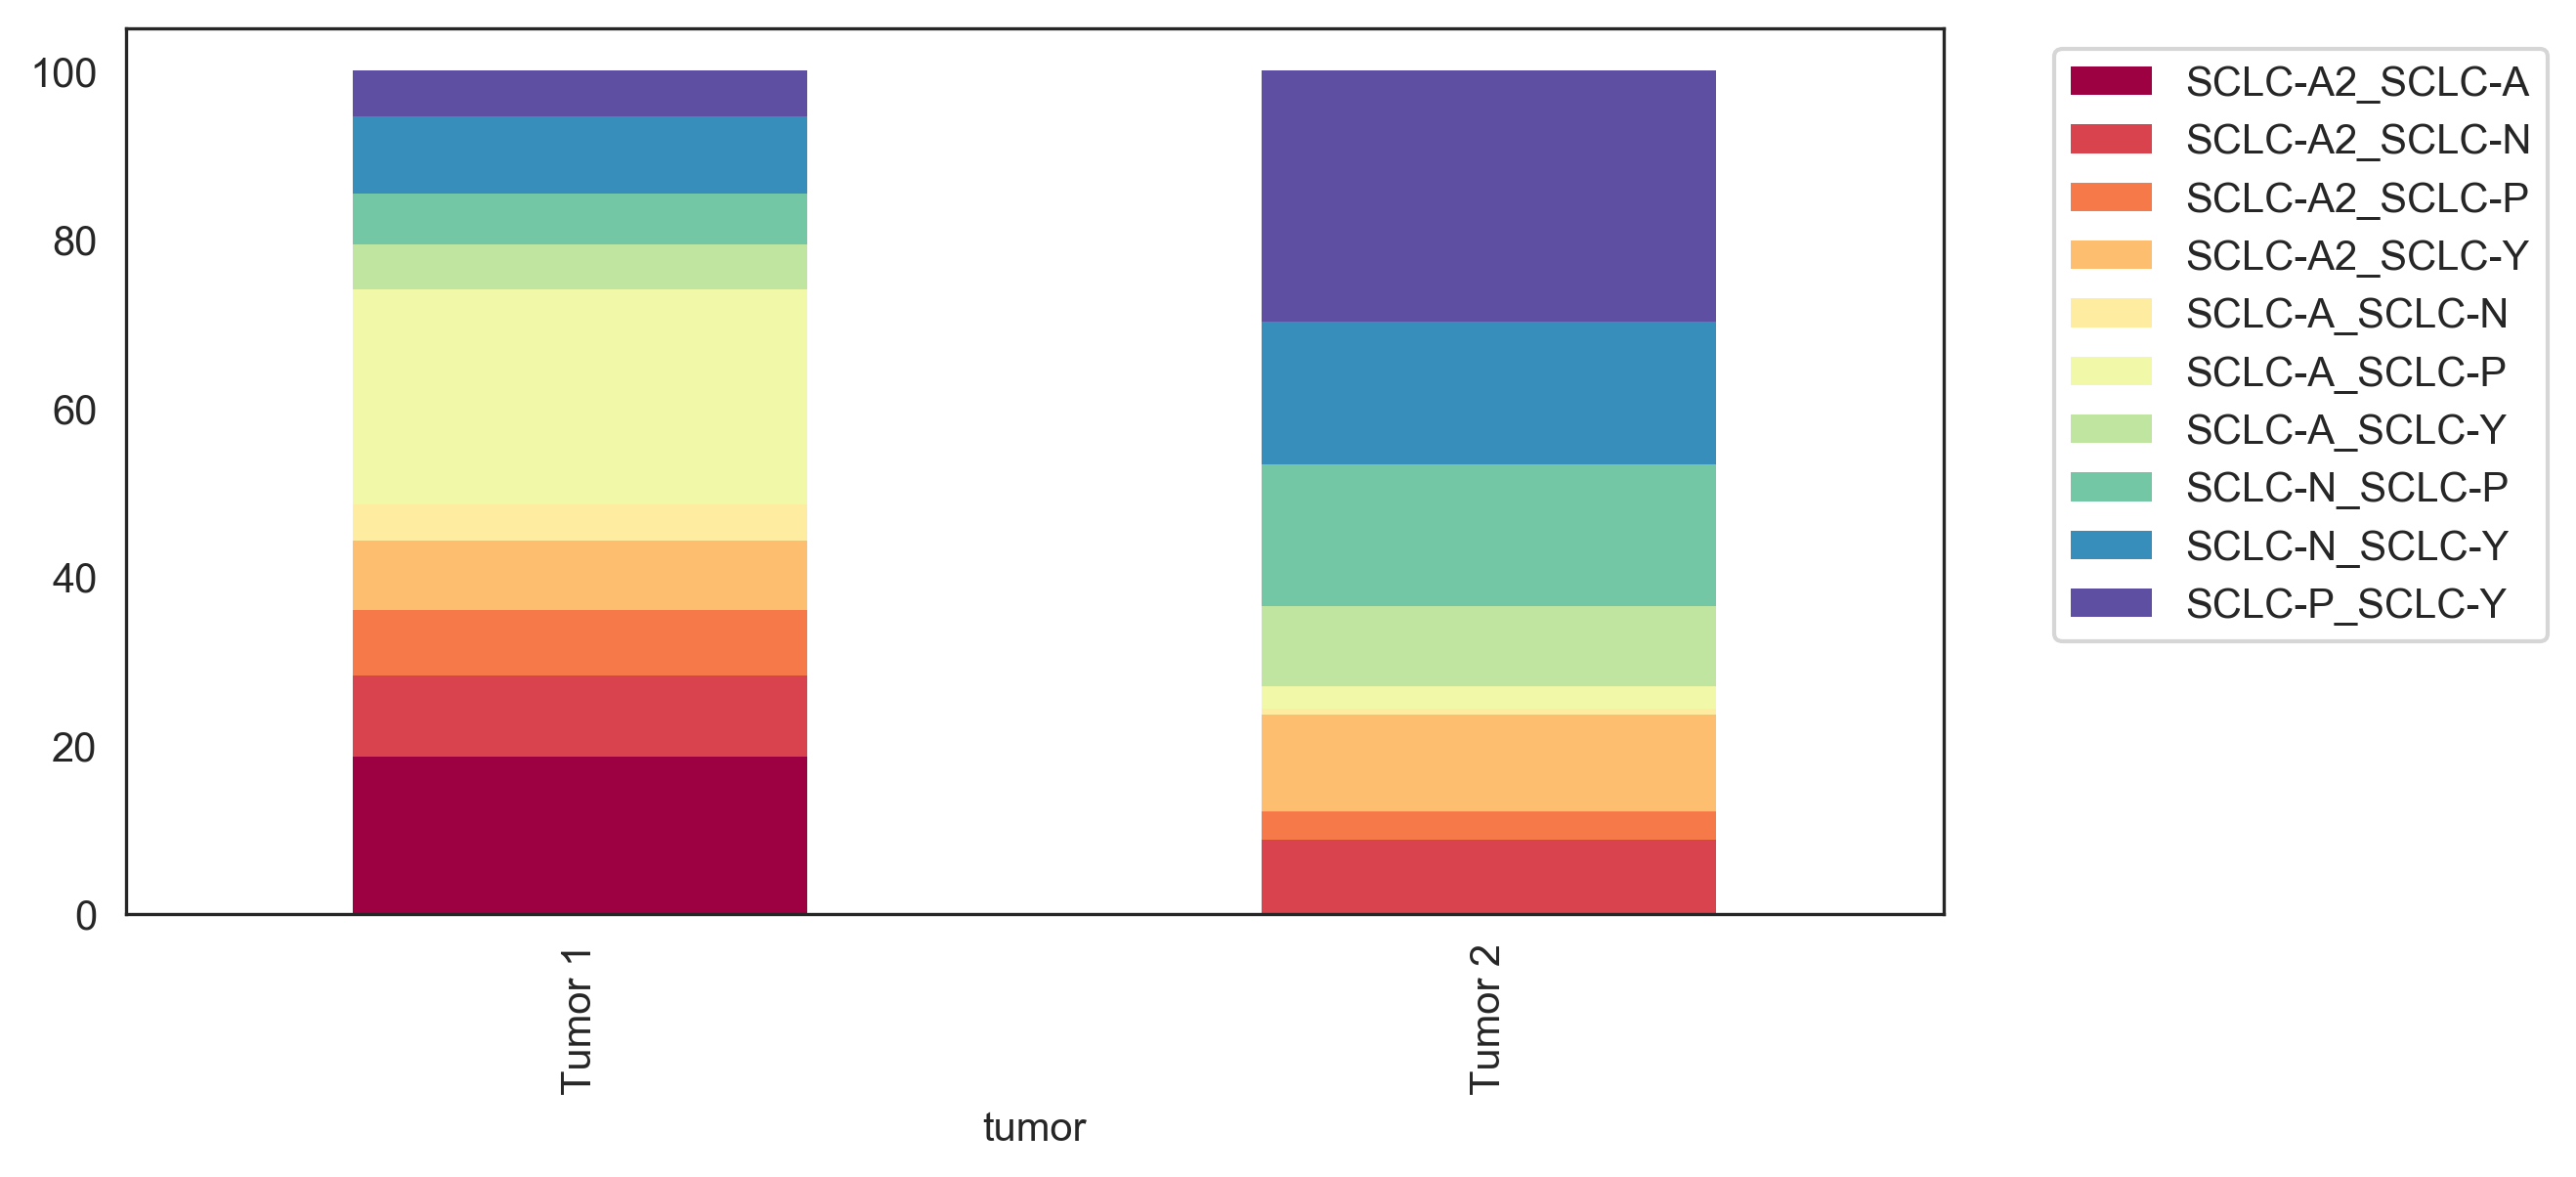

In [43]:
_adata = adata[adata.obs['arc_aa_type'] == 'Generalist']
plt.rcParams["figure.figsize"] = [8, 4]
((pd.crosstab(_adata.obs["tumor"], _adata.obs['arc_pheno']).T /
  pd.crosstab(_adata.obs["tumor"], _adata.obs['arc_pheno']).sum(axis=1)) * 100).T.plot(kind='bar',
                                                                                              stacked=True,
                                                                                              linewidth=0, cmap = 'Spectral')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.savefig('./figures/human_tumors/arc_aa_generalist_subtypes.pdf')

Tumor 1
Index(['SCLC-A_Score', 'SCLC-A2_Score', 'SCLC-P_Score'], dtype='object')


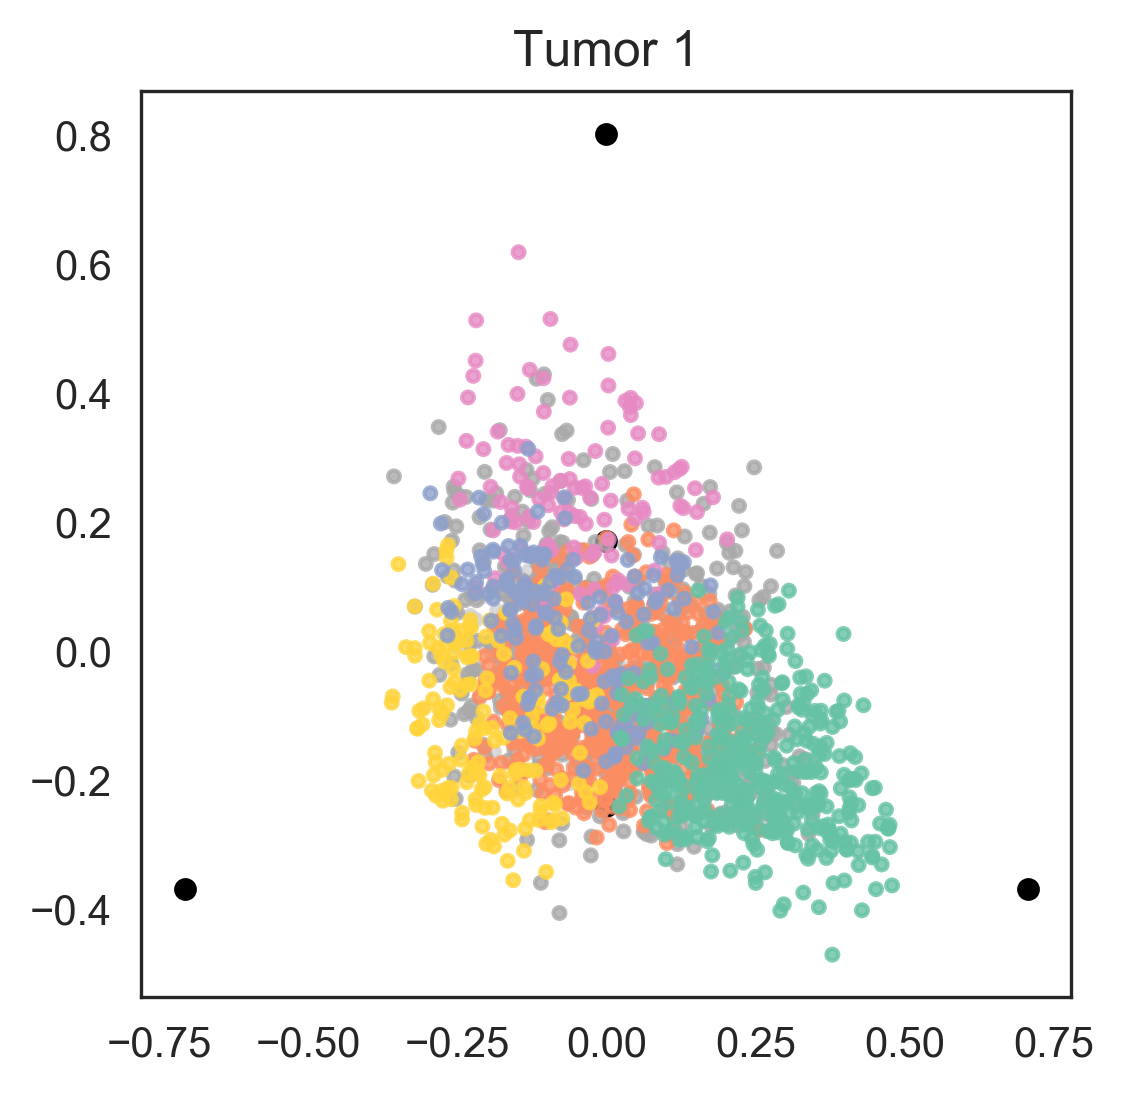

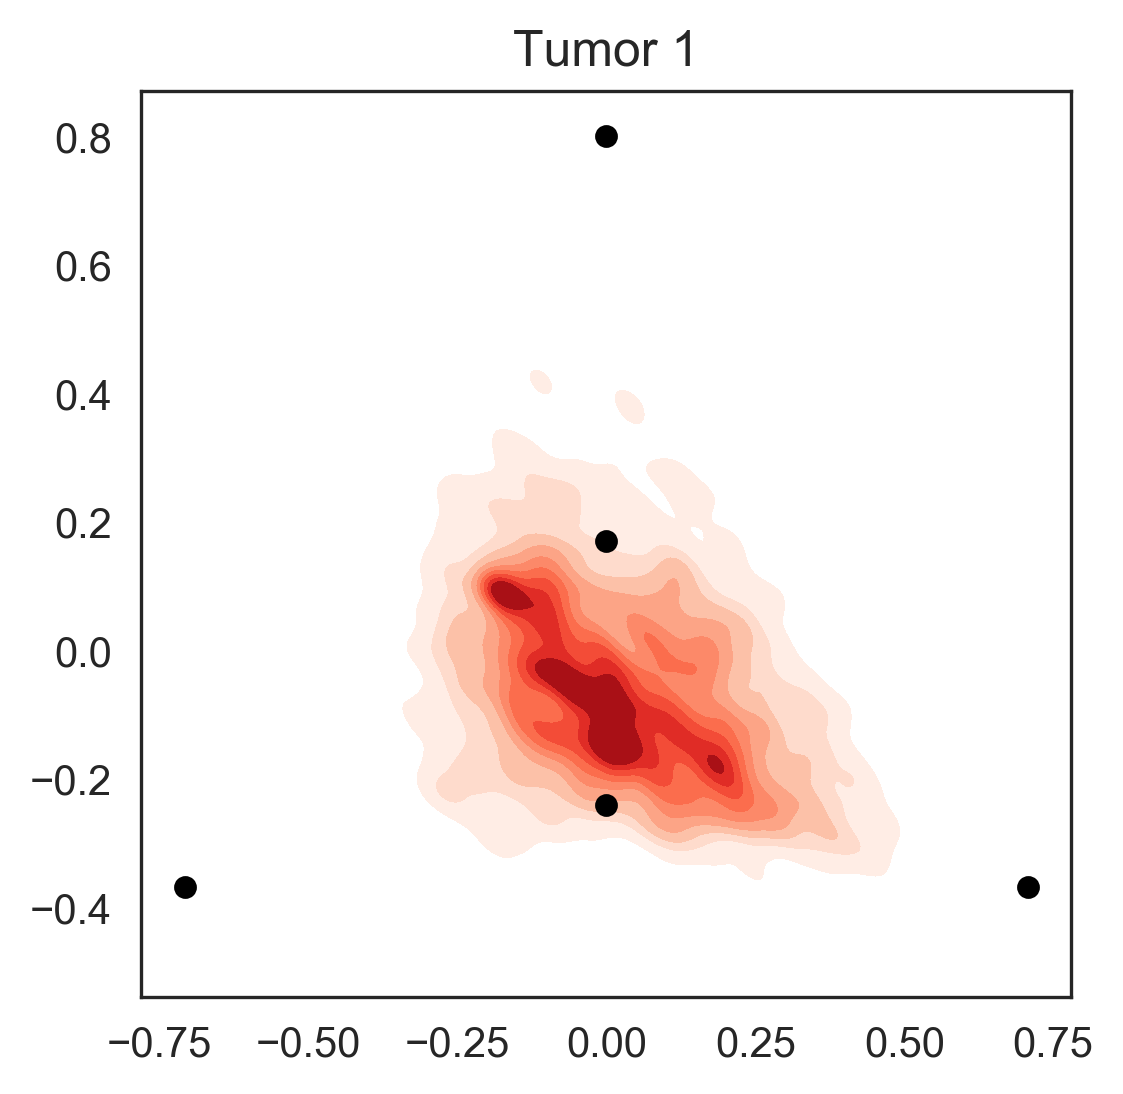

Tumor 2
Index(['SCLC-Y_Score', 'SCLC-P_Score', 'SCLC-N_Score'], dtype='object')


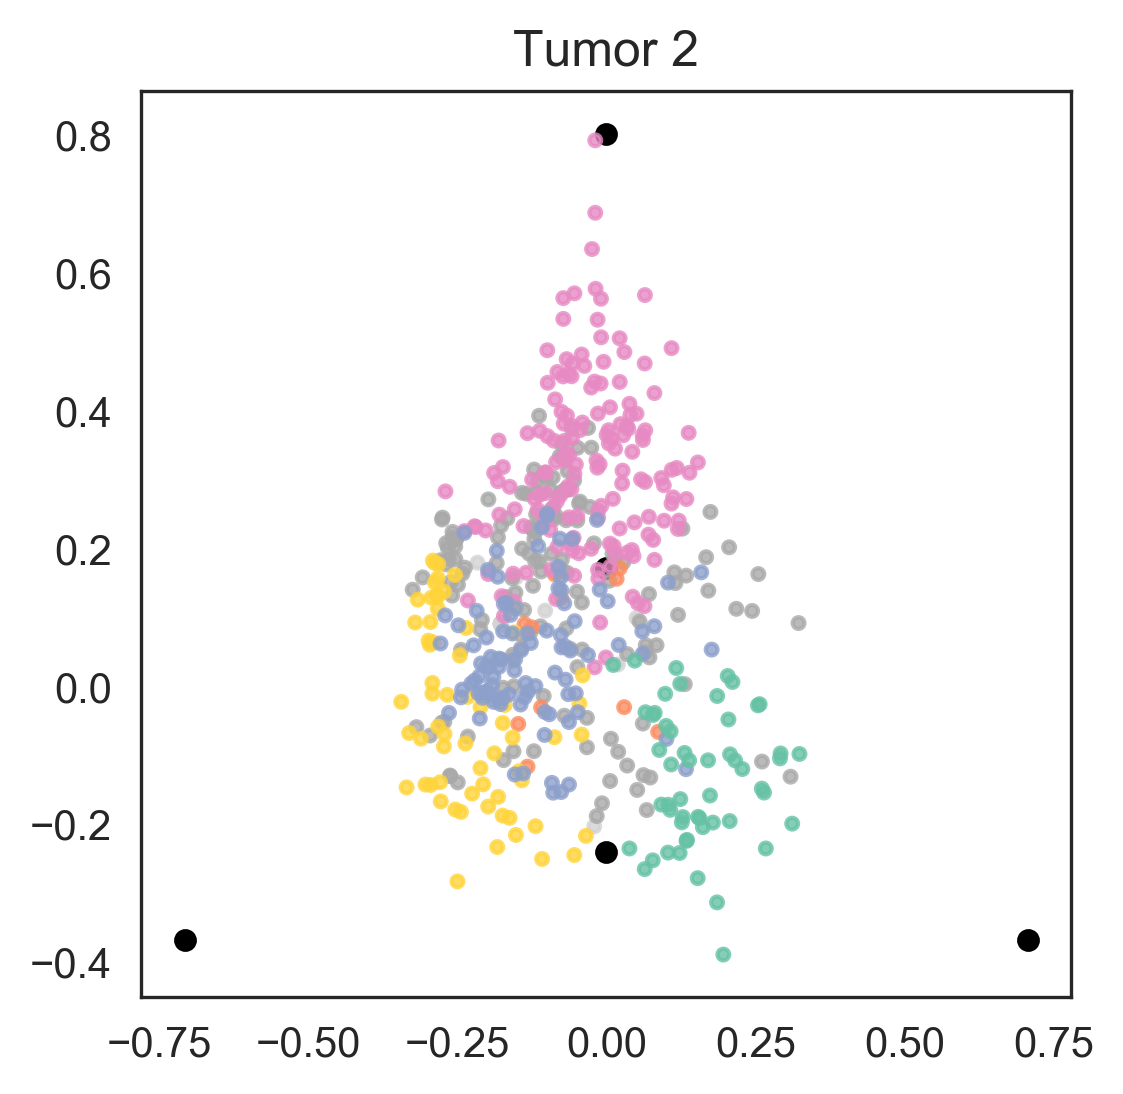

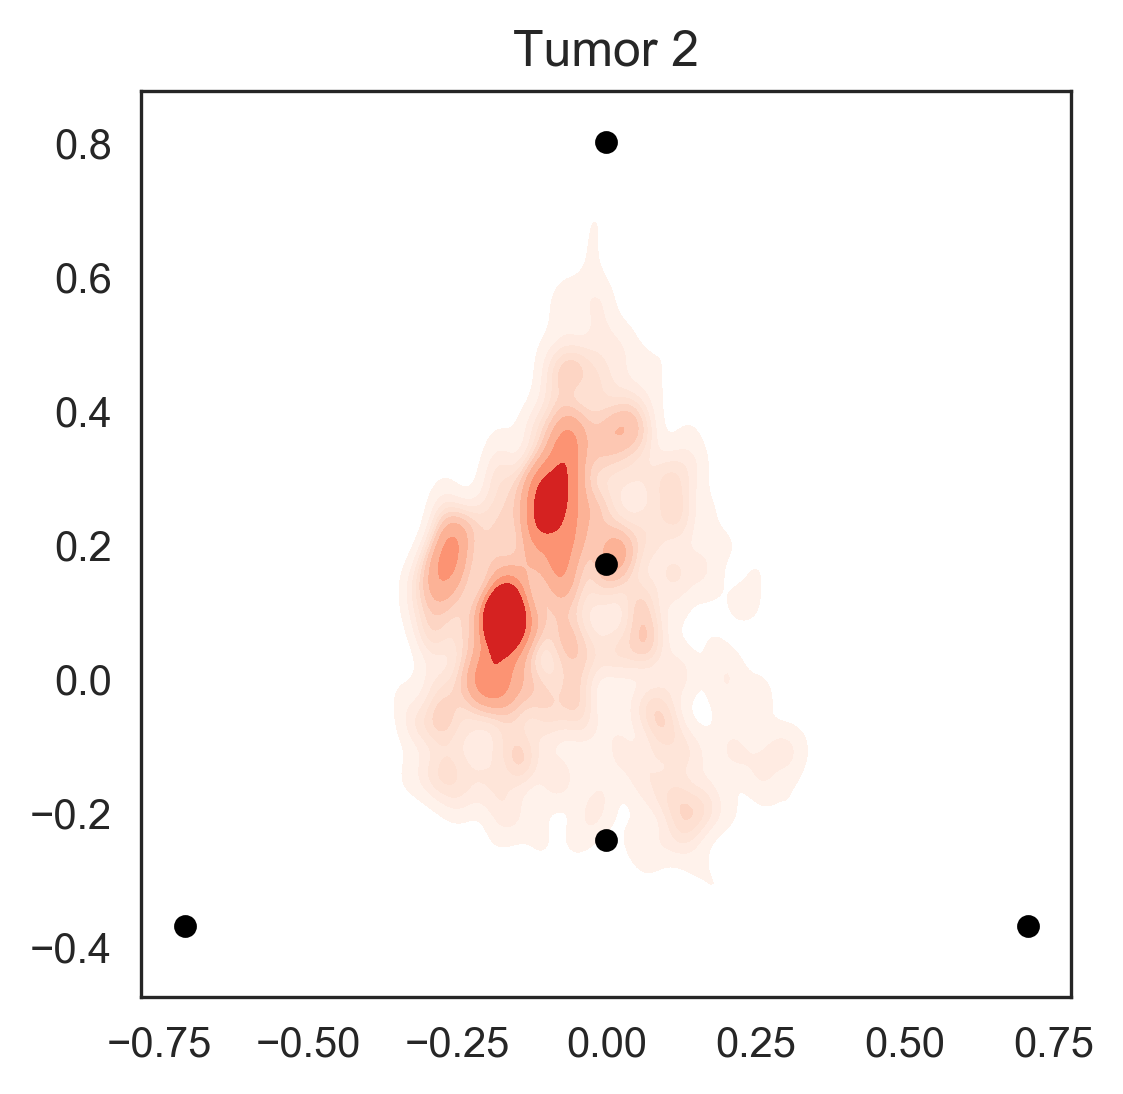

In [37]:
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 300
mb.pl.archetype_diagrams(adata, sig_matrix, color_dict=color_dict, groupby='tumor',color = 'arc_aa_type',
                        order = ['SCLC-Y','SCLC-A','SCLC-P','SCLC-N','SCLC-A2'], norm = 'None',sizes = 20,
                        figsize=(4,4), score_name = '_Score', alpha = .8, s = 8, arrows = False, density=True)


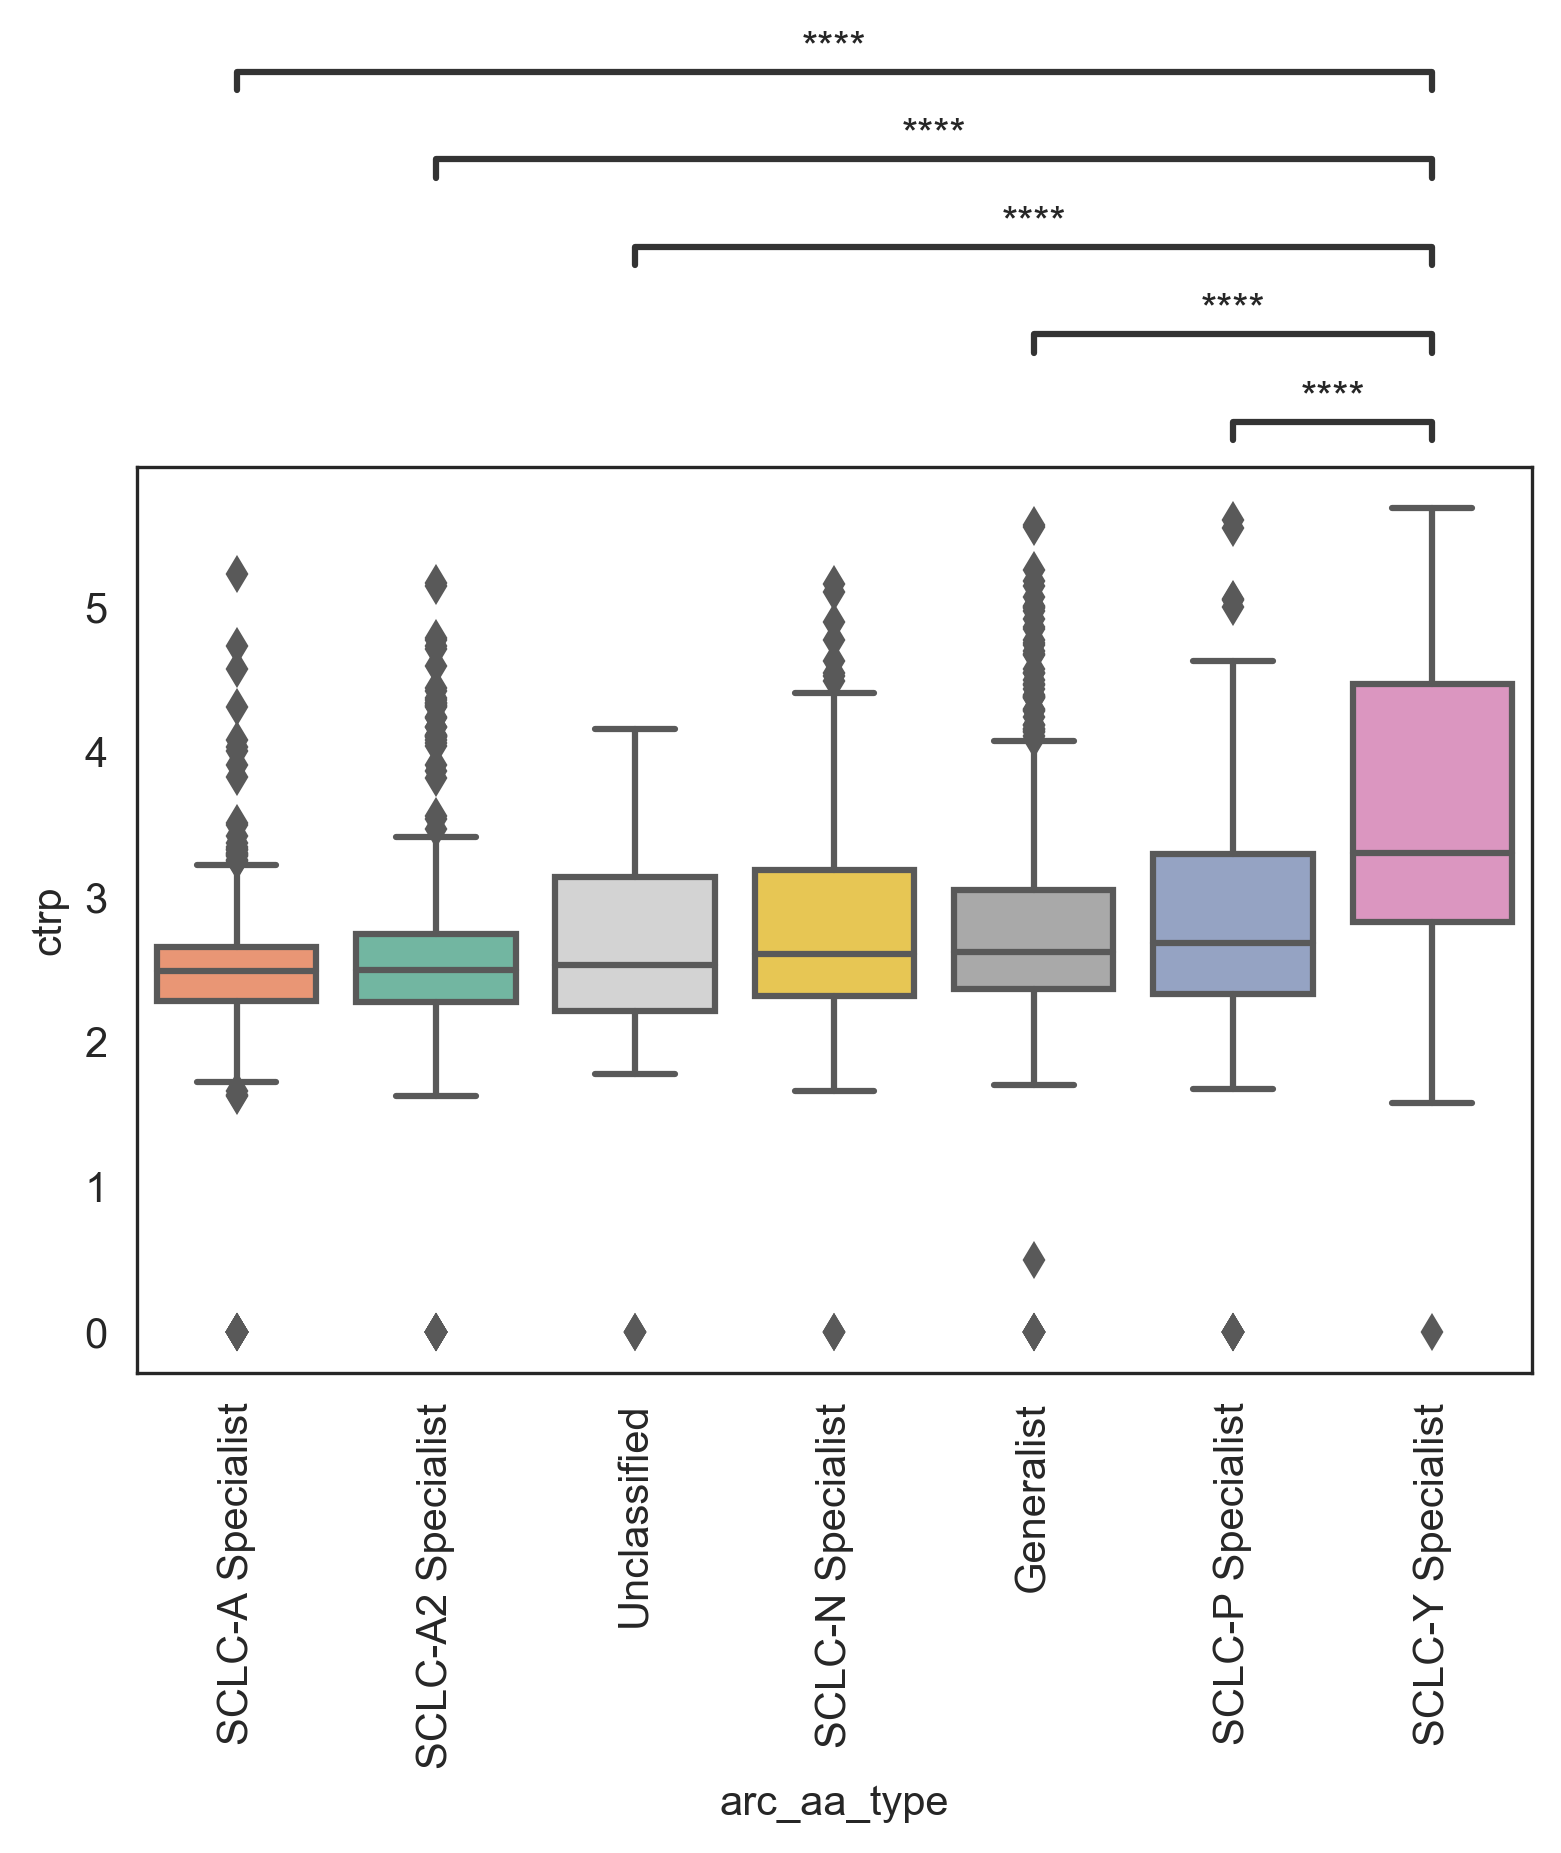

In [61]:
from statannot import add_stat_annotation
cp = ['#a9a9a9','#d3d3d3','#fc8d62', '#66c2a5', '#FFD43B', '#8da0cb', '#e78ac3'] #for use with generalists, etc.
plt.figure(figsize=(6,4))
df = adata.obs[['arc_aa_type','ctrp']].pivot(columns='arc_aa_type')
df.columns = df.columns.droplevel(0)
sorted_index = df.median().sort_values().index

ax = sns.boxplot(data = adata.obs, x='arc_aa_type',y = 'ctrp',palette =[cp[2],cp[3],cp[1],cp[4],cp[0],cp[5],cp[6],], order = sorted_index)
#                 order = sorted(list(set(adata.obs['arc_aa_type']))))
add_stat_annotation(ax, data=adata.obs, x='arc_aa_type',y = 'ctrp',
#                     order = sorted(list(set(adata.obs['arc_aa_type']))),
                    order = sorted_index,
                    box_pairs=[('SCLC-Y Specialist','Unclassified'),
                              ('SCLC-Y Specialist','SCLC-A Specialist'), ("SCLC-Y Specialist", "SCLC-A2 Specialist"),
                               ("SCLC-Y Specialist", "SCLC-P Specialist"),
                              ("Generalist", "SCLC-Y Specialist")],
                    test='Mann-Whitney', text_format='star', loc='outside', verbose=0)
plt.xticks(rotation = 90)
plt.savefig('./figures/human_tumors/ctrp_by aa_type.pdf')

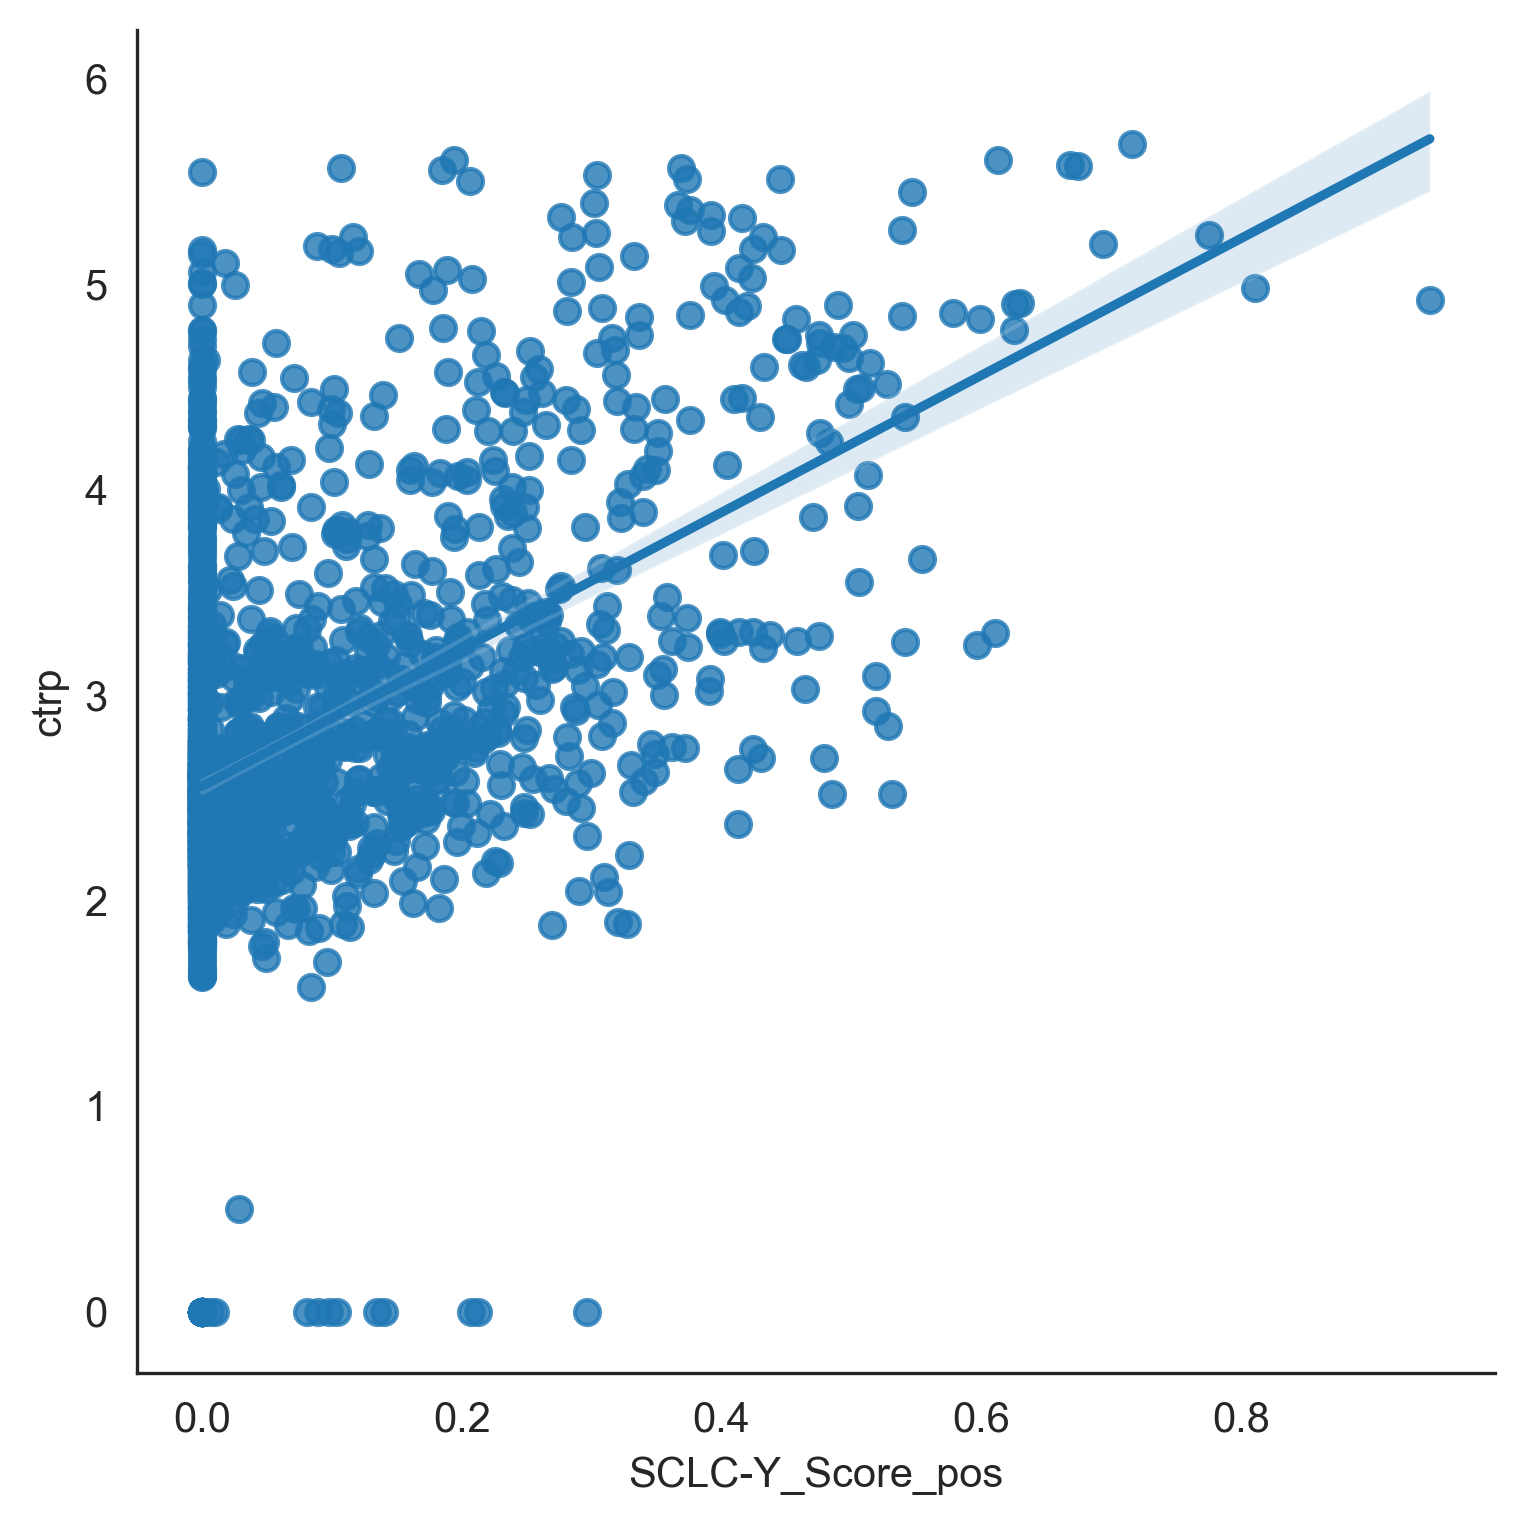

In [34]:
sns.lmplot(data = adata.obs, x = 'SCLC-Y_Score_pos', y = 'ctrp')
plt.savefig('./figures/human_tumors/ctrp_vs_y_score.pdf')

In [35]:
adata.write_h5ad('../int/tumor/adata06.h5ad')

... storing 'Phenotype' as categorical
... storing 'Phenotype_extended' as categorical
... storing 'arc_pheno' as categorical
... storing 'arc_aa_type' as categorical


In [3]:
adata = sc.read_h5ad('../int/tumor/adata06.h5ad')

# Additional Analyses

In [61]:
mb.pp.doublet_detections(adata,layer='matrix')
# adata_small.obs['doublet_scores'] = adata.obs['doublet_scores']
# adata_small.obs['predicted_doublets'] = adata.obs['predicted_doublets']

Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.65
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 2.3%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 1.7%
Elapsed time: 1.5 seconds


In [62]:
adata.obs.groupby('arc_aa_type').sum()['predicted_doublets']

arc_aa_type
Generalist            0
SCLC-A Specialist     1
SCLC-A2 Specialist    0
SCLC-N Specialist     0
SCLC-P Specialist     0
SCLC-Y Specialist     0
Unclassified          0
Name: predicted_doublets, dtype: int64

In [23]:

plt.rcParams["figure.figsize"] = [8, 4]
((pd.crosstab(adata_small.obs['predicted_doublets'], adata_small.obs['Phenotype'])/
  pd.crosstab(adata_small.obs['predicted_doublets'], adata_small.obs['Phenotype']).sum(axis = 0))*100)

Phenotype           Generalist   None  SCLC-A  SCLC-A2  SCLC-N  SCLC-P  SCLC-Y
predicted_doublets                                                            
False                99.950446  100.0   100.0    100.0   100.0   100.0   100.0
True                  0.049554    0.0     0.0      0.0     0.0     0.0     0.0

In [57]:
mb.pp.magic_recipe(adata, [i.capitalize() for i in tfs], 'Phenotype_filtered', fname='rpm')


Calculating MAGIC...
  Running MAGIC on 15257 cells and 21163 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 10.95 seconds.
    Calculating KNN search...
    Calculated KNN search in 33.19 seconds.
    Calculating affinities...
    Calculated affinities in 31.84 seconds.
  Calculated graph and diffusion operator in 76.00 seconds.
  Calculating imputation...
  Calculated imputation in 0.08 seconds.
Calculated MAGIC in 83.04 seconds.
Calculating PCA...
Calculated PCA in 9.02 seconds.
Calculating imputation...
Calculated imputation in 0.08 seconds.


In [8]:
adata.write_h5ad('../int/tumor/adata06.h5ad')

Index(['SCLC-A_Score', 'SCLC-P_Score', 'SCLC-A2_Score'], dtype='object')


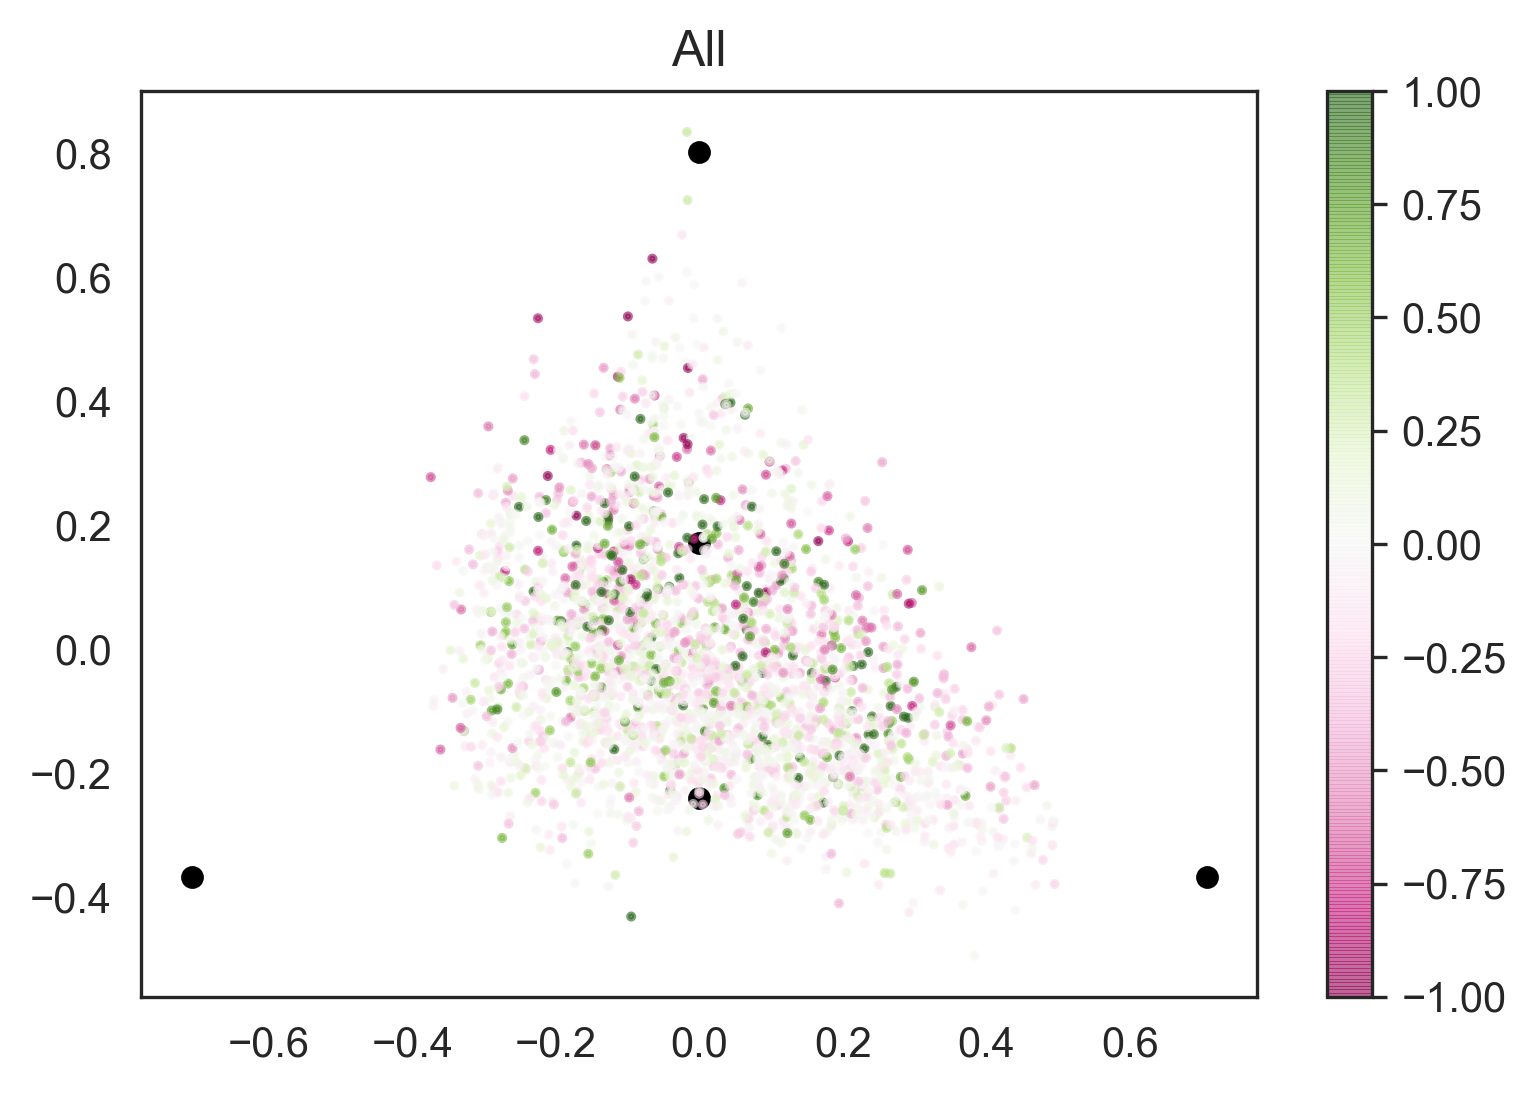

In [6]:
 import matplotlib as mpl
mpl.rcParams['figure.dpi']= 300
adata_small.obs['phase_score'] = adata.obs['G2M_score'] - adata.obs['S_score']
cp = ['#fc8d62', '#66c2a5', '#FFD43B', '#8da0cb', '#e78ac3']
color_dict = {'SCLC-Y': cp[4], 'SCLC-A': cp[0], 'SCLC-A2': cp[1], 'SCLC-N': cp[2], 'SCLC-P': cp[3],
              'Generalist': 'darkgray', 'None': 'lightgrey'}
mb.pl.archetype_diagrams(adata_small, sig_matrix, color_dict=color_dict, groupby='None',color='phase_score',grid = False,
                        order = ['SCLC-Y','SCLC-A','SCLC-P','SCLC-N','SCLC-A2'], norm = 'None',num_steps = 40,cmap = 'PiYG',
                        multiplier=1, figsize=(6,4), score_name = '_Score', alpha = .6, s = 2, sizes = 20, vmin = -1)

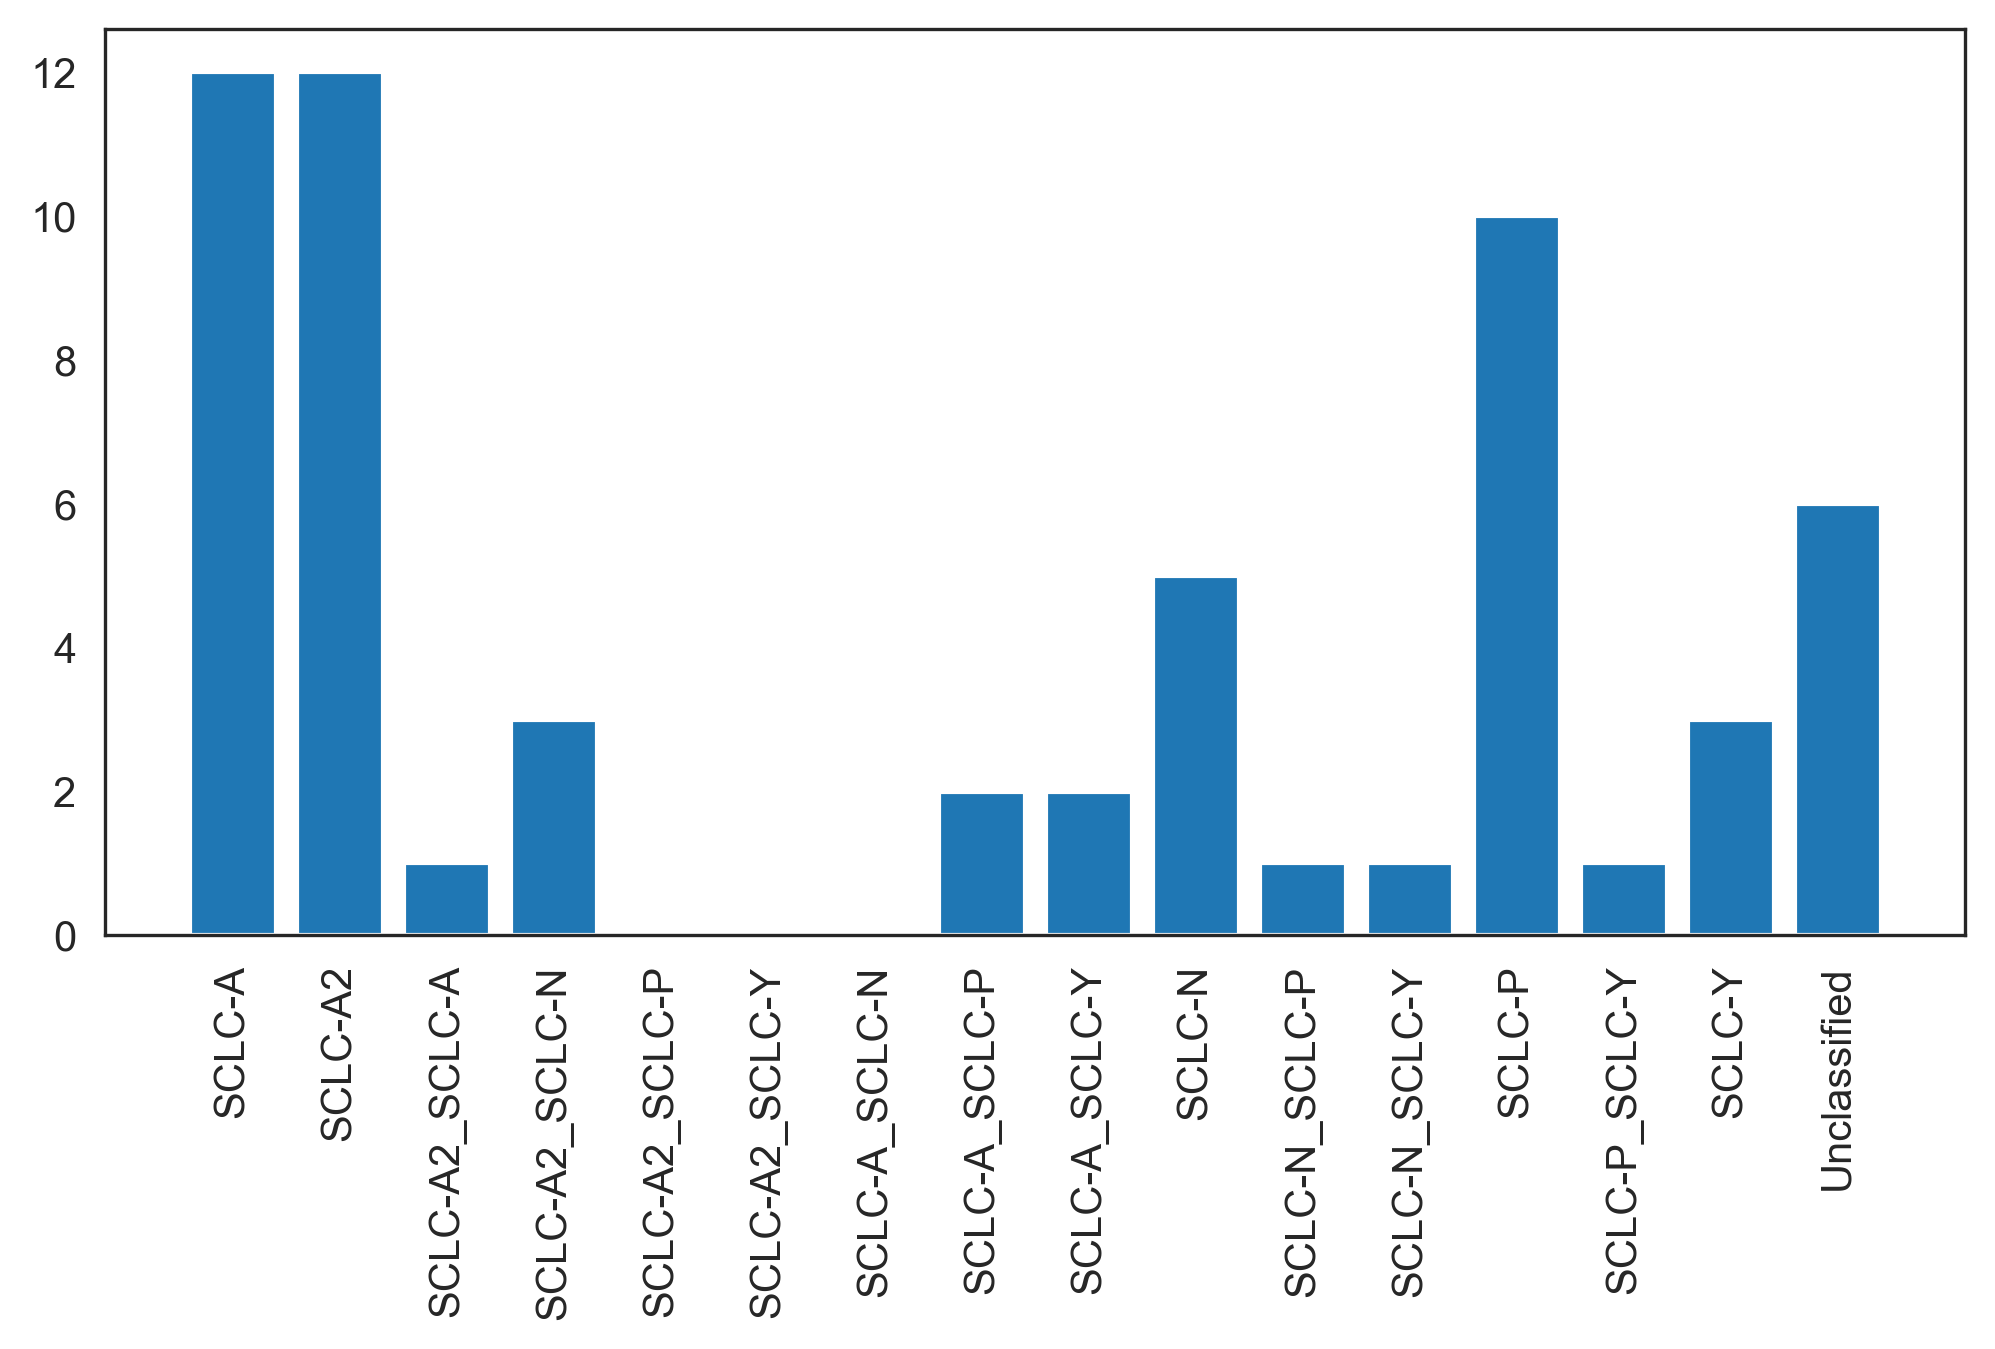

In [50]:
# f, (ax, ax2) = plt.subplots(2, 1, sharex=True, figsize = (6,4))

# plot the same data on both axes
plt.bar(pd.crosstab(adata.obs['arc_pheno'], adata.obs['absorbing']).index, 
       pd.crosstab(adata.obs['arc_pheno'], adata.obs['absorbing'])['True'])
plt.xticks(rotation = 90)
# ax2.bar(pd.crosstab(adata_small.obs['Phenotype'], adata_small.obs['absorbing']).index, 
#        pd.crosstab(adata_small.obs['Phenotype'], adata_small.obs['absorbing'])['True'])
# zoom-in / limit the view to different portions of the data
# ax.set_ylim(0, 50)  # outliers only
# ax2.set_ylim(0, 100)  # most of the data

# hide the spines between ax and ax2
# ax.spines['bottom'].set_visible(False)
# ax2.spines['top'].set_visible(False)
# ax.xaxis.tick_top()
# ax.tick_params(labeltop=False)  # don't put tick labels at the top
# ax2.xaxis.tick_bottom()
plt.savefig('./figures/human_tumors/absorbing_tumors_arc-pheno.pdf')

# Multipotency

In [47]:
from random import seed
from scvelo.tools.utils import scale, groups_to_bool, strings_to_categoricals
from scvelo.preprocessing.neighbors import get_connectivities
from scipy.stats import entropy
def write_to_obs(adata, key, vals, cell_subset=None):
    if cell_subset is None:
        adata.obs[key] = vals
    else:
        vals_all = adata.obs[key].copy() if key in adata.obs.keys() else np.zeros(adata.n_obs)
        vals_all[cell_subset] = vals
        adata.obs[key] = vals_all


def multipotency(data, vkey='velocity', groupby=None, groups=None, self_transitions=True, basis=None, eps_eig = 1e-3,
                    weight_diffusion=0, scale_diffusion=1, eps=1e-2, copy=False, random_seed = 1):
    seed(random_seed)
    adata = data.copy() if copy else data
    strings_to_categoricals(adata)
#     if groupby is not None:
#         logg.warn(
#             "Set groupby IFF you have sufficient evidence that each group occupies a different phenotypic landscape."
#         )

    categories = [None]
    if groupby is not None and groups is None:
        categories = adata.obs[groupby].cat.categories
    aa_types = list(set(adata.obs['arc_aa_type']))
    ent = pd.DataFrame(np.zeros((len(adata.obs_names),len(aa_types)+1)), index=adata.obs_names)
    col = aa_types.copy()
    col.append('entropy')
    ent.columns = col
    for c, cat in enumerate(categories):
        groups = cat if cat is not None else groups
        cell_subset = groups_to_bool(adata, groups=groups, groupby=groupby)
        _adata = adata if groups is None else adata[cell_subset]
        connectivities = get_connectivities(_adata, 'distances')

        T = scv.tl.transition_matrix(_adata, vkey=vkey, basis=basis, weight_diffusion=weight_diffusion,
                              scale_diffusion=scale_diffusion, self_transitions=self_transitions, backward=False)
        print('(' + groups + ')' if isinstance(groups, str) else '')
        T = T.todense()
        Q, ends = mb.ps.extract_Q(T, connectivities = connectivities, eigen=True,eps = eps, eps_eig = eps_eig)
        t_ind,r_ind = mb.ps.return_t_r_indices(T, connectivities = connectivities,eigen = True, eps = eps, eps_eig = eps_eig)
        R = T[t_ind.reshape(-1, 1), r_ind]
        N = mb.ps.compute_N(Q)

        p_abs = N.dot(R)
        p_abs_df = pd.DataFrame(p_abs)
        p_abs_df.columns = _adata[r_ind,].obs_names
        p_abs_df.index = _adata[t_ind,].obs_names
        
        p_abs_df = p_abs_df.append(_adata[r_ind,].obs['arc_aa_type'])
        p_abs_group = p_abs_df.T.groupby('arc_aa_type').sum().T
        for i,r in p_abs_group.iterrows():
            ent.loc[i] = r
            ent.loc[i]['entropy']=entropy(r, base = 2)
        
    ent = ent.fillna(0)
    adata.obs['entropy'] = ent['entropy']
    adata.uns['entropy_prob'] = ent
    return adata if copy else None

In [51]:
multipotency(adata, groupby='tumor', basis = 'X_pca', self_transitions=False)

(Tumor 1)
Eigenvalues:  [0.99999994]
    identified 1 end points
(Tumor 2)
Eigenvalues:  [0.9999994]
    identified 1 end points


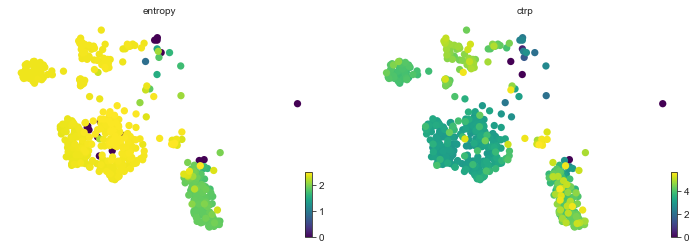

In [58]:
scv.pl.umap(adata[adata.obs['tumor']=='Tumor 2'], color = ['entropy','ctrp'], cmap = 'viridis')

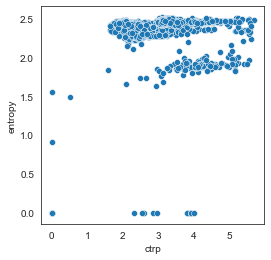

In [60]:
plt.figure(figsize = (4,4))
sns.scatterplot(data=adata.obs, x = 'ctrp', y = 'entropy')

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

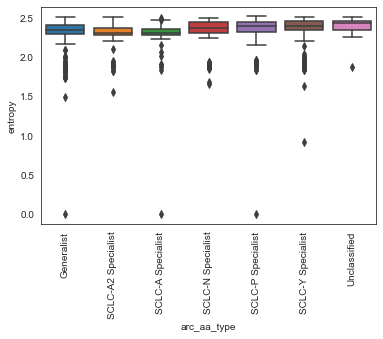

In [62]:
sns.boxplot(data =adata[adata.obs['absorbing']=='False'].obs, x = 'arc_aa_type', y = 'entropy')
plt.xticks(rotation=90)

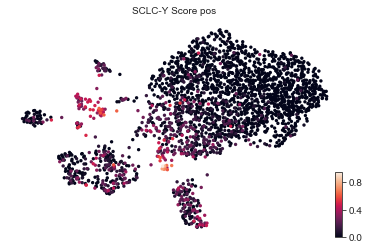

In [73]:
scv.pl.umap(adata, color = 'SCLC-Y_Score_pos')

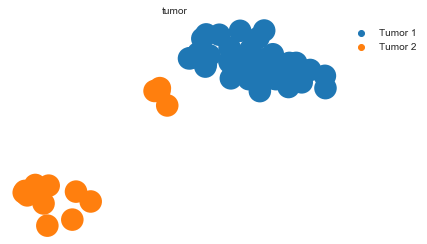

Trying to set attribute `.uns` of view, copying.


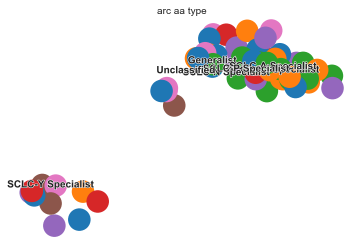

In [65]:
scv.pl.umap(adata[adata.obs['absorbing']=="True"], color = 'tumor')
scv.pl.umap(adata[adata.obs['absorbing']=="True"], color = 'arc_aa_type')